<a href="https://colab.research.google.com/github/ksb7762-k/Dart-B/blob/main/KAGRI_KSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 캐글 필사 링크 https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic

# Contents of the Notebook

part1 : Exploratory Data Analysis(EDA)
1) 피쳐에 대한 분석
2) 다양한 피쳐를 고려해서 관계나 경향을 찾아내는 것

Part2 : Feature Engineering and Data Cleaning:
1) 몇가지 피쳐를 추가
2) 불필요한 피쳐를 제거
3) 모델링을 위한 적절한 형태로 피쳐를 변환

Part3 : Predicive Modeling
1) 기초 알고리즘 운용
2) 교차 검증
3) 앙상블 학습법
4) 중요한 피쳐 추출


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/titanic/titanic/asset/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


나이, 방, 탑승항구가 결측치가 있다. 수정하겠다.

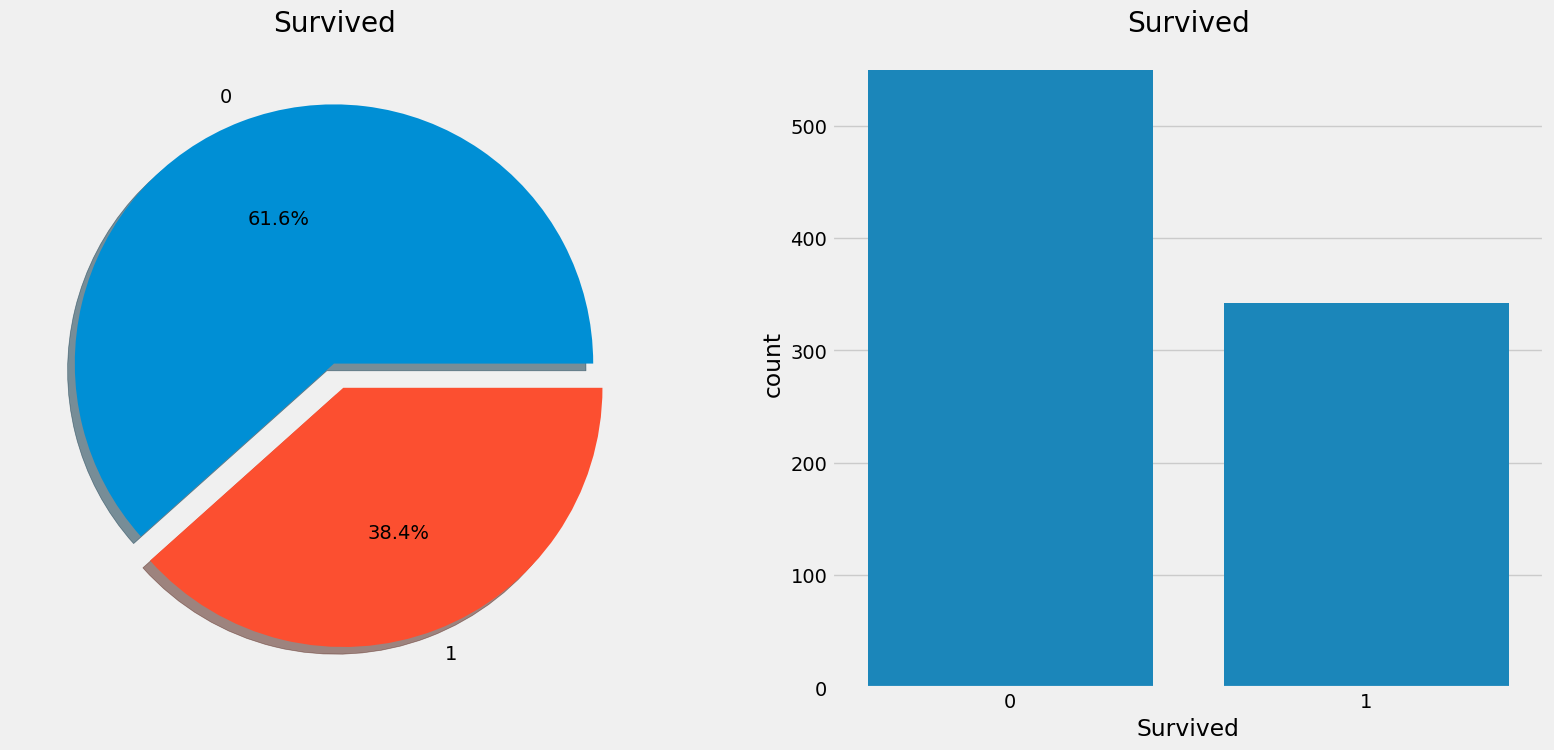

In [ ]:
import matplotlib.pyplot as plt  # 시각화를 위한 matplotlib 라이브러리
import seaborn as sns  # 고급 시각화를 위한 seaborn 라이브러리

,f ax = plt.subplots(1, 2, figsize=(18, 8))  # 1행 2열의 subplot 생성, 전체 크기는 (18, 8)

data['Survived'].value_counts().plot.pie(     # 'Survived' 컬럼의 값을 세어 파이차트로 시각화
    explode=[0, 0.1],                         # 두 번째 조각(생존자)을 약간 튀어나오게
    autopct='%1.1f%%',                        # 비율을 소수점 첫째 자리까지 표시
    ax=ax[0],                                 # 왼쪽 subplot에 그림
    shadow=True                               # 그림자 효과 추가
)

ax[0].set_title('Survived')     # 왼쪽 subplot의 제목 설정
ax[0].set_ylabel('')            # 파이차트의 y축 라벨 제거

sns.countplot(x='Survived', data=data, ax=ax[1])  # Seaborn을 사용하여 생존 여부의 빈도수 막대그래프
ax[1].set_title('Survived')      # 오른쪽 subplot의 제목 설정

plt.show()  # 모든 그래프를 출력

# autopct
: Matplotlib의 pie() 함수에서 사용하는 옵션 중 하나로, **원형 차트(pie chart)**에서 각 조각의 백분율을 표시할 때 사용

📊 특성(Feature)의 종류
1. 범주형 특성 (Categorical Features)
범주형 변수는 두 개 이상의 범주(카테고리) 를 가지며, 각 값은 그 범주 중 하나로 분류될 수 있음
예를 들어, 성별은 ‘남자(male)’와 ‘여자(female)’라는 두 가지 범주를 가진 범주형 변수
이런 변수는 정렬이나 순서를 매길 수 없어, 그래서 일반적으로 명목형 변수(Nominal Variables) 라고도 불림

🔹 이 데이터셋에서의 범주형 변수 예시: Sex, Embarked

2. 순서형 특성 (Ordinal Features)
순서형 변수는 범주형 변수와 비슷하지만, 값들 사이에 상대적인 순서나 정렬이 가능하다는 점이 다름
예를 들어, Height라는 특성이 Tall, Medium, Short 세 가지 값을 가진다면, 이건 순서형 변수
왜냐하면 여기엔 크고 작음의 순서가 있기 때문임

🔹 이 데이터셋에서의 순서형 변수 예시: PClass (탑승 클래스)

3. 연속형 특성 (Continuous Feature)
연속형 변수는 어떤 두 값 사이의 값도 가질 수 있는 변수임
즉, 특정 범위 내에서 연속적인 수치를 갖는 특성임.

🔹 이 데이터셋에서의 연속형 변수 예시: Age

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

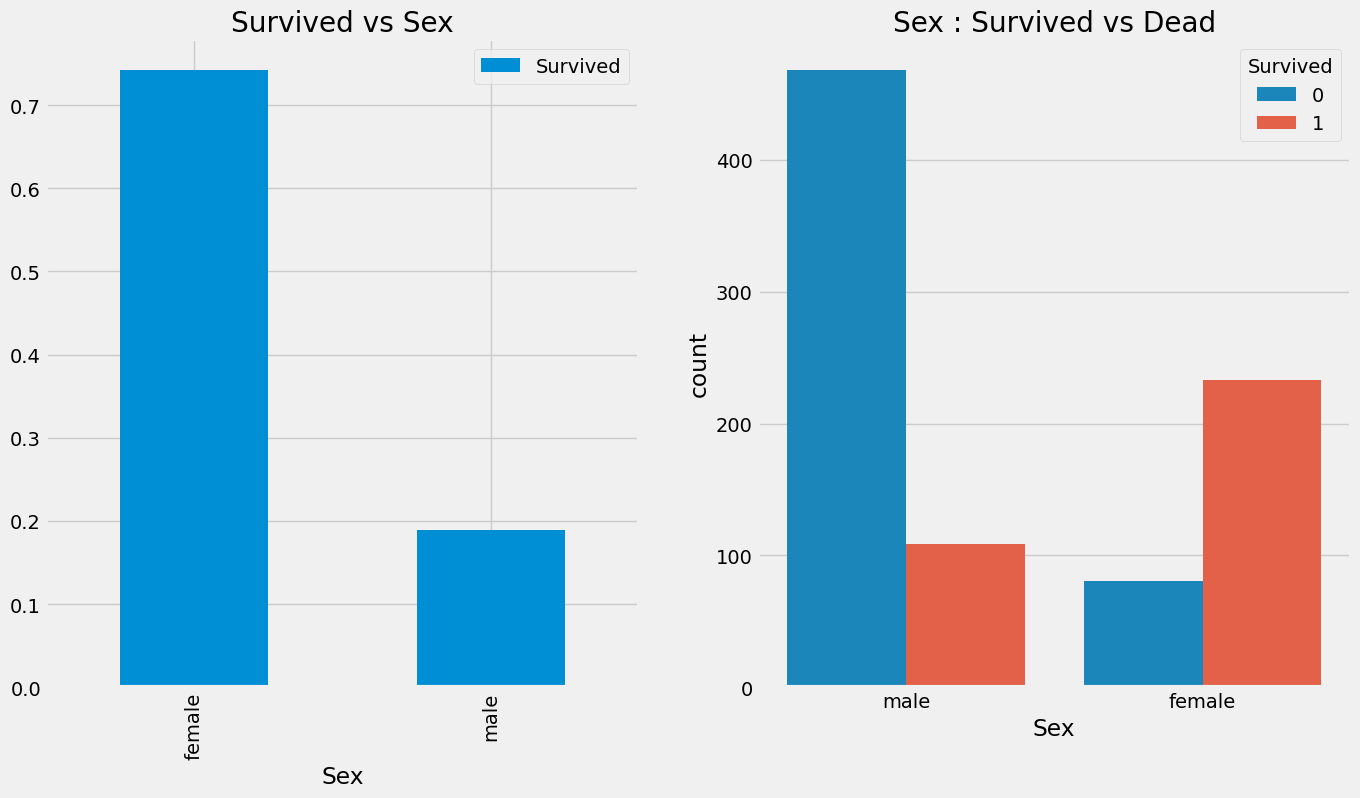

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(15, 8))  # 1행 2열 subplot 생성, 전체 크기는 (15, 8)

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
# 성별(Sex)별 생존률(Survived)의 평균을 계산하고 막대그래프로 시각화
# 예: 남성 생존률 vs 여성 생존률

ax[0].set_title('Survived vs Sex')  # 왼쪽 그래프의 제목 설정

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
# 성별을 기준으로 생존/사망 분포를 시각화 (막대그래프)
# hue='Survived'로 생존 여부를 색상으로 구분

ax[1].set_title('Sex : Survived vs Dead')  # 오른쪽 그래프의 제목 설정

plt.show()  # 모든 그래프 출력

Pclass --> Ordinal Feature

In [ ]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')
# Pclass(탑승 클래스)와 Survived(생존 여부)의 교차표 생성
# 행: Pclass, 열: Survived (0=사망, 1=생존)
# margins=True → 행과 열의 총합("All") 추가
# 값의 크기에 따라 색상 그라데이션 적용 (컬러맵: summer_r)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


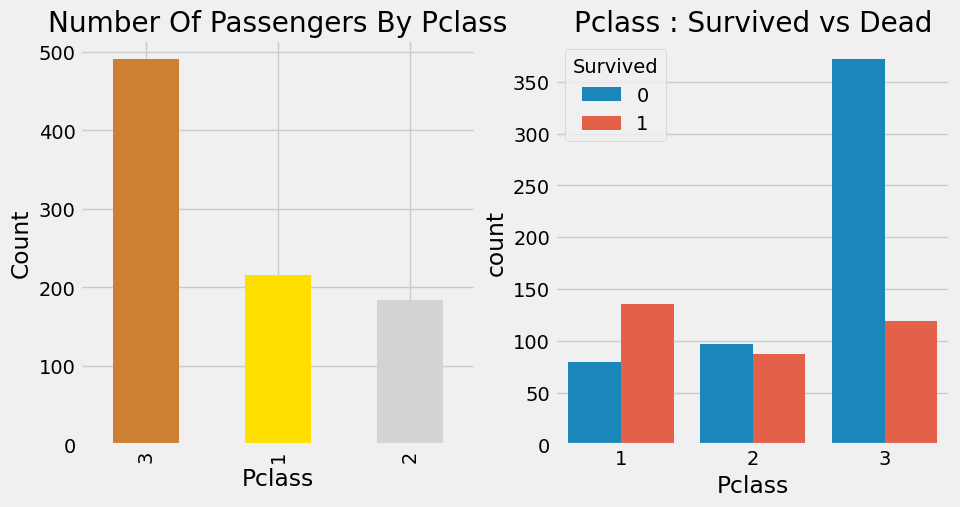

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))
# 1행 2열 subplot 생성, 전체 크기는 (10, 5)

data['Pclass'].value_counts().plot.bar(
    color=['#CD7F32', '#FFDF00', '#D3D3D3'],  # 클래스별로 브론즈, 골드, 실버 컬러 설정 (3등급 → 1등급 순)
    ax=ax[0]                                  # 왼쪽 그래프 영역에 그림
)
ax[0].set_title('Number Of Passengers By Pclass')  # 왼쪽 그래프 제목
ax[0].set_ylabel('Count')                          # y축 레이블 설정

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
# Pclass 별 생존/사망 인원 수 막대그래프, hue로 생존 여부 구분
ax[1].set_title('Pclass : Survived vs Dead')       # 오른쪽 그래프 제목

plt.show()  # 그래프 출력

In [ ]:
pd.crosstab([data.Sex,data.Survived], data.Pclass,margins=True).style.background_gradient(cmap = 'summer_r')

🔄 요약
sns.factorplot() → ❌ (구버전, 사용 중단)

sns.catplot(..., kind='bar') → ✅ (현재 표준)

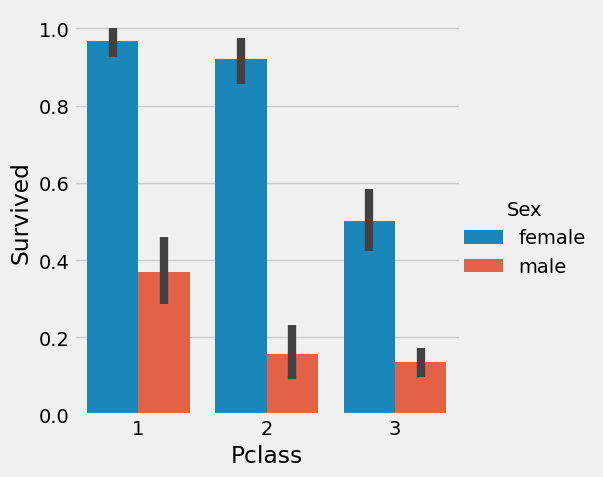

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='bar')  # Pclass별, 성별에 따른 평균 생존률 막대그래프
plt.show()  # 그래프 출력

Age--> Continous Feature

In [ ]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


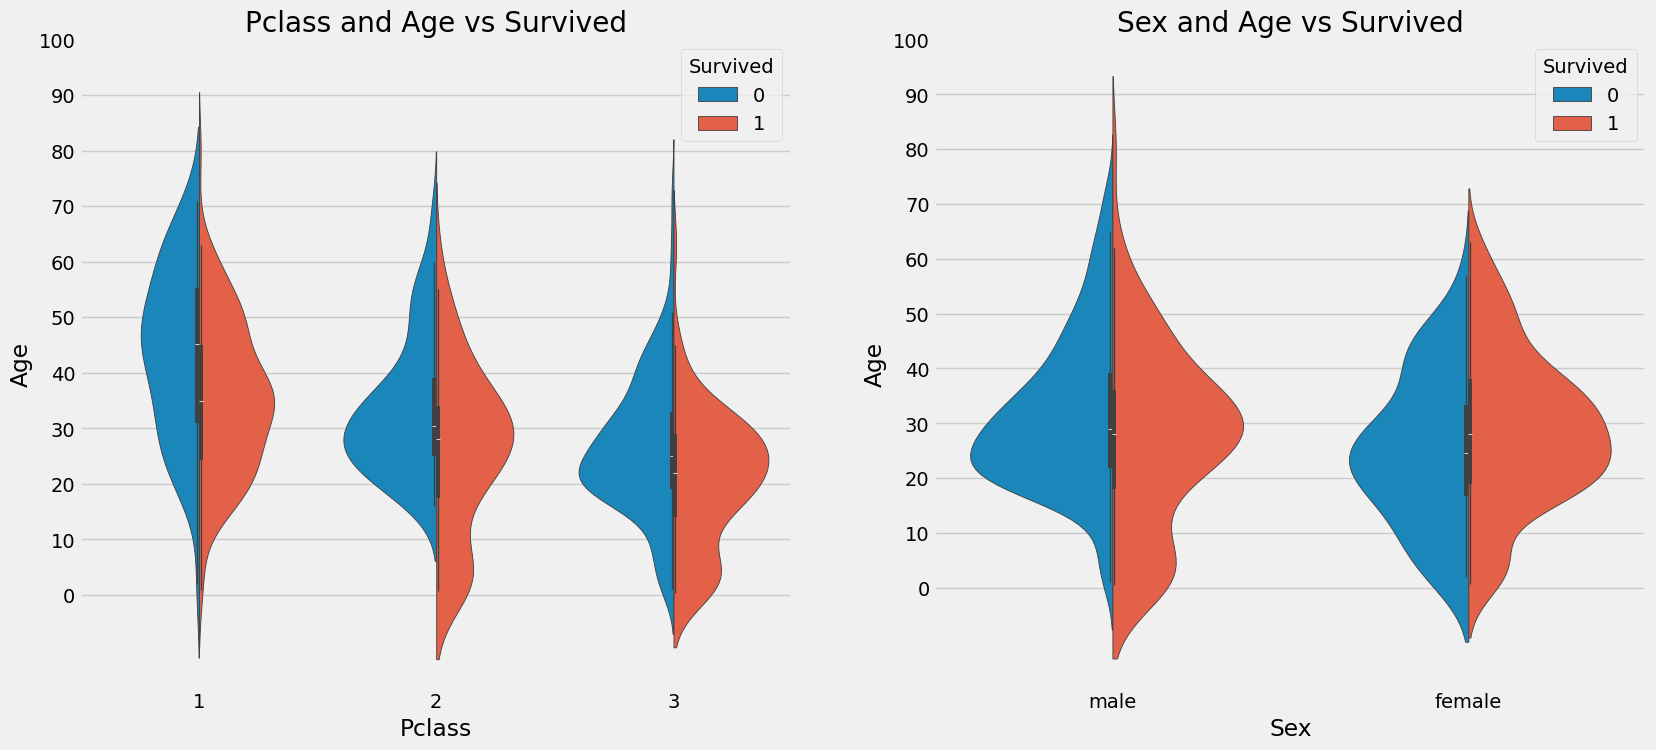

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
# 1행 2열 subplot 생성, 전체 크기 (18, 8)

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=True, ax=ax[0])
# 왼쪽: Pclass(등급)와 Age(나이) 분포를 Survived(생존 여부)로 나눠 바이올린 플롯 시각화
ax[0].set_title('Pclass and Age vs Survived')  # 제목 설정
ax[0].set_yticks(range(0, 110, 10))             # y축 눈금(나이) 설정: 0부터 100까지 10단위

sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=True, ax=ax[1])
# 오른쪽: 성별(Sex)과 나이 분포를 생존 여부로 나눠 시각화
ax[1].set_title('Sex and Age vs Survived')      # 제목 설정
ax[1].set_yticks(range(0, 110, 10))              # y축 눈금(나이) 설정

plt.show()  # 그래프 출력

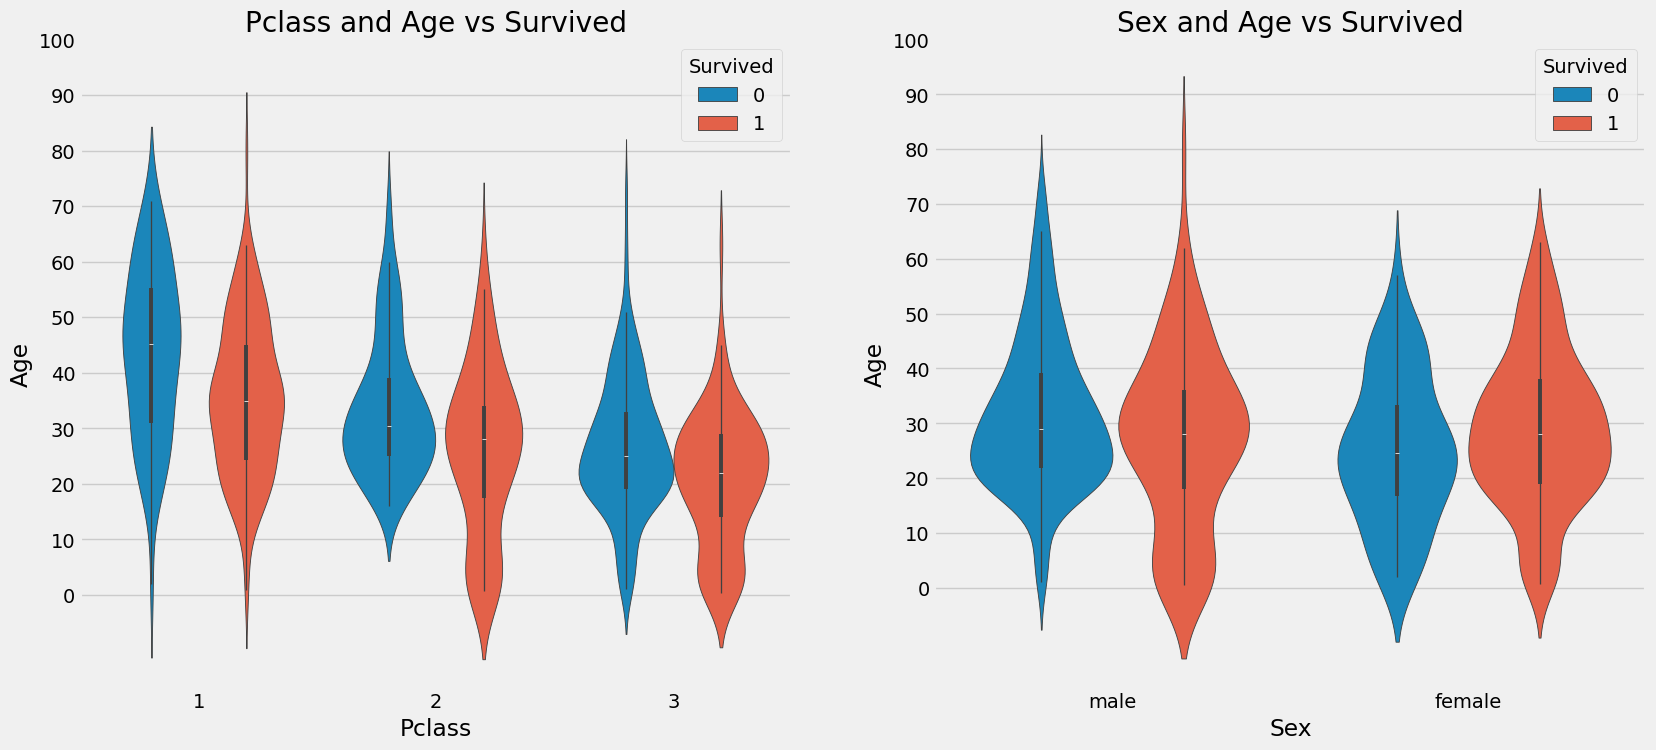

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=data, split=False, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=data, split=False, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()


처음에 봤듯이, Age(나이) 특성에는 177개의 결측값(NaN)이 있습니다. 이러한 NaN 값을 대체하기 위해, 데이터셋의 평균 나이를 할당할 수 있습니다.

하지만 문제는, 다양한 나이대의 사람들이 있다는 점입니다. 예를 들어, 4살짜리 어린이에게 평균 나이인 29세를 할당하는 건 말이 되지 않습니다. 그렇다면, 승객이 어느 연령대에 속하는지 파악할 수 있는 방법이 있을까요?

빙고!!!! 우리는 Name(이름) 특성을 확인해볼 수 있습니다. 이 특성을 살펴보면, 이름에 Mr, Mrs 같은 호칭(salutation) 이 포함되어 있는 것을 알 수 있습니다. 따라서 각각의 그룹(Mr, Mrs 등)에 해당하는 평균 나이 값을 할당할 수 있습니다.

In [ ]:
data['Initial'] = 0                           # ① 'Initial'이라는 새로운 열을 생성하고, 초기값으로 0을 할당합니다.

for i in data:                                # ② 'data'의 열 이름(column names)을 반복합니다.
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
                                              # ③ 'Name' 열에서 알파벳으로 이루어진 단어(호칭 등)를 추출하여
                                              #     마침표('.') 앞까지 매칭된 첫 단어를 'Initial' 열에 저장합니다.
                                              #     예: 'Mr. John Smith' → 'Mr'

# ✅ DataFrame 컬럼 접근 방식 정리

# 1. 대괄호 [] 방식 (가장 일반적이고 안전)
data['Name']  # 모든 컬럼 이름 접근 가능 (공백, 숫자 포함 등)

# 2. 점 . 방식 (간편하지만 제한 있음)
data.Name     # 컬럼 이름이 파이썬 변수처럼 유효할 때만 사용 가능
              # 예: 공백, 특수문자, 숫자로 시작하면 사용 불가
              # 컬럼명이 DataFrame 메서드명과 겹쳐도 문제 생길 수 있음

# 📌 예시
data['Fare Amount']   # ✅ 가능
data.Fare Amount      # ❌ 에러

data['Name']          # ✅ 가능
data.Name             # ✅ 가능 (조건 충족 시)

# ⭐ 정리
# - 빠르고 간단하게 사용할 땐 dot(.) 표기법도 괜찮지만,
# - 실제 분석, 모델링 작업에서는 대괄호([]) 방식이 더 안전하고 권장됨

# ✅ str.extract('([A-Za-z]+)\.') 설명

# 예시 코드:
data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')

# 이 코드는 'Name' 컬럼에서 이름에 포함된 호칭(Mr, Mrs, Miss 등)을 추출해
# 'Initial'이라는 새 컬럼에 저장합니다.

# 🔍 정규표현식 구성 요소:
# ([A-Za-z]+)\.

# - (...) : 괄호는 캡처 그룹. 이 안에 매칭된 문자열을 추출한다는 뜻
# - [A-Za-z]+ : 대문자 A~Z, 소문자 a-z 중 하나 이상 반복되는 문자열 (예: 'Mr', 'Mrs', 'Dr')
# - \. : 마침표(.) 문자 자체를 의미 (정규표현식에서 '.'는 모든 문자이므로, '\'로 이스케이프 처리)

# 🧪 예시:
# 'Mr. John Smith'   →  'Mr'
# 'Mrs. Anna Bell'   →  'Mrs'
# 'Dr. Kevin Brown'  →  'Dr'

# 📌 요약:
# 'Name' 컬럼에서 마침표 앞의 영문 단어(호칭)를 추출하는 코드로,
# 머신러닝 전처리에서 나이 예측이나 그룹 분석 등에 유용하게 쓰임


In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
pd.crosstab(data.Initial,data.Sex).style.background_gradient(cmap='summer_r')

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


# ✅ pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') 설명

# 1. pd.crosstab(data.Initial, data.Sex)
# - 'Initial'(호칭)과 'Sex'(성별) 사이의 빈도수를 교차표 형태로 집계
# - 예: Mr, Mrs, Miss 등 각각이 남자(Male), 여자(Female)와 몇 번 나타나는지 계산

# 2. .T
# - 표를 전치(transpose)함. 즉, 행과 열을 바꿈
# - 성별(Sex)이 행으로, 호칭(Initial)이 열로 바뀜

# 3. .style.background_gradient(cmap='summer_r')
# - 데이터프레임에 색상 그라데이션 스타일을 적용
# - 숫자가 높을수록 진한 색, 낮을수록 연한 색으로 시각화
# - 'summer_r'은 색상 맵의 이름으로, 초록-노랑 계열을 역방향으로 적용

# 📌 결과
# - 성별별로 각 호칭이 몇 번 나왔는지를 보기 쉽게 색상으로 시각화한 표가 출력됨
# - 데이터 탐색(EDA) 시 패턴 파악에 매우 유용함

# pd.crosstab(data.Initial, data.Sex).T 를 쓰느니 애초에 순서를 바꿔  pd.crosstab(data.Sex, data.Initial) 로 쓰면 전치(.T) 안 해도 똑같은 결과를 얻을 수 있음

In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


# 결측된 나이(NaN)를 채우기

In [ ]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age'] = 46

#   data.loc[행 조건, 열 이름 또는 열 리스트]  
## ==>   행 조건도 가능한지는 처음 알았다.


In [ ]:
data.Age.isnull().any()

np.False_

data.Age.isnull() 각 값이 NaN인지 여부를 Boolean으로 반환  
data.Age.isnull().any() 그 중 하나라도 True가 있는지 확인 → 결과는 True 또는 False  

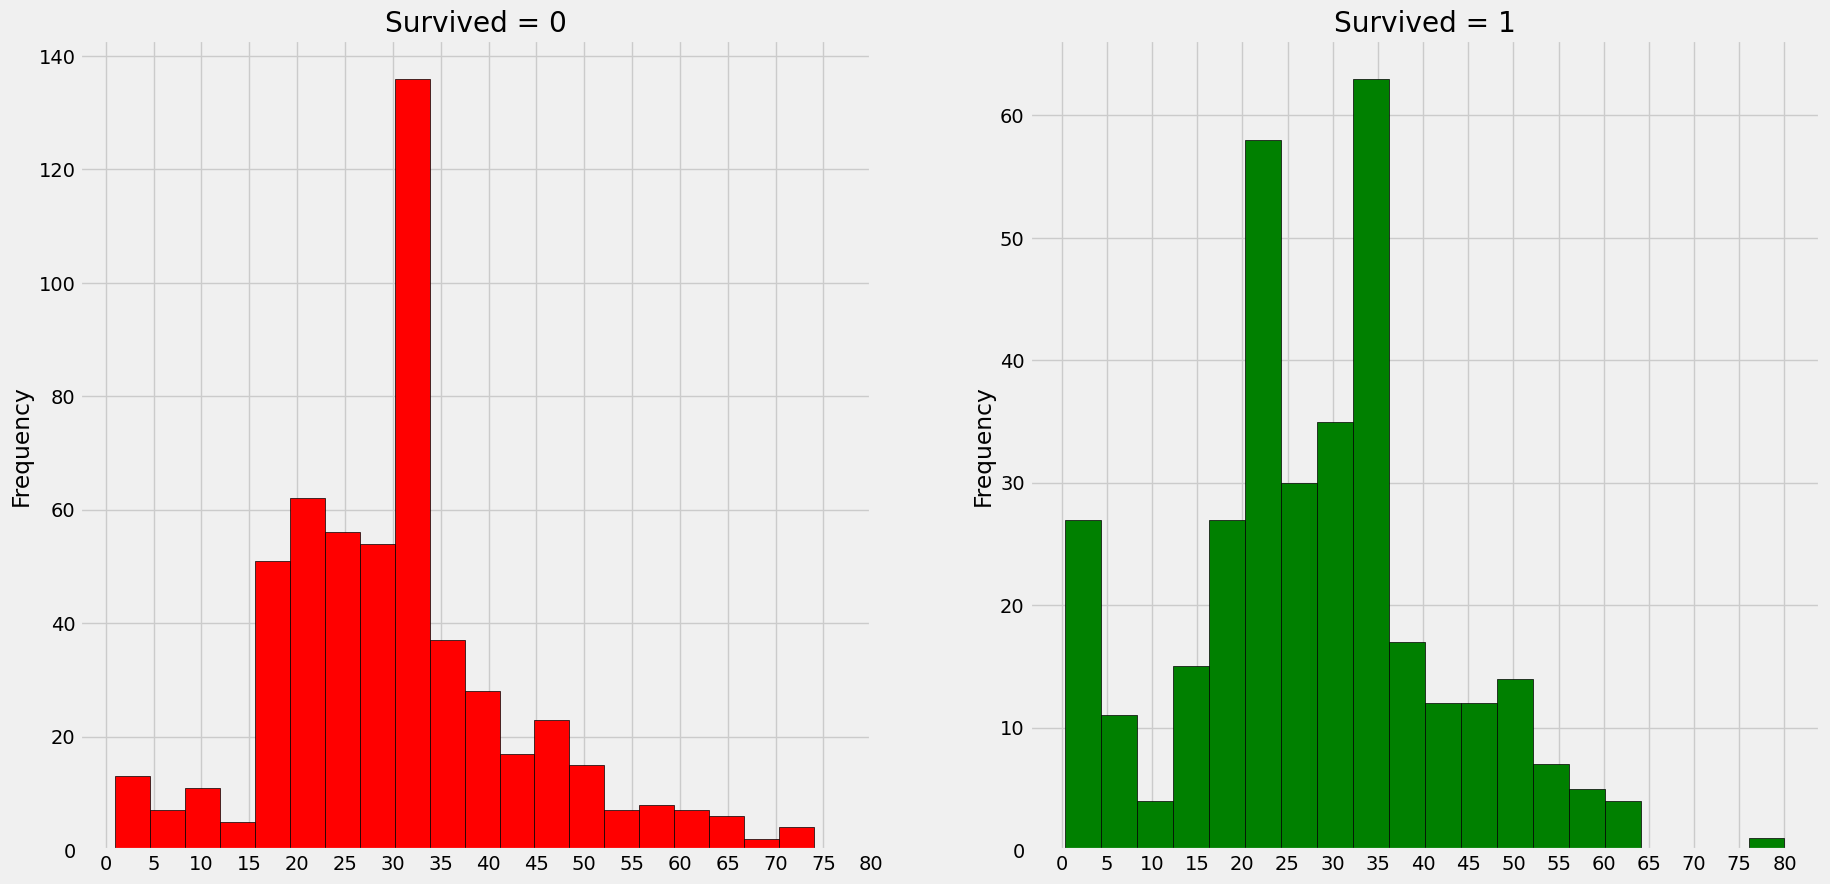

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
# 1행 2열로 그래프 subplot 2개 생성, 전체 그림 크기 설정 (가로 20, 세로 10)

data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
# 생존하지 못한 승객(Survived=0)의 나이 분포를 히스토그램으로 그림 (빨간색)

ax[0].set_title('Survived = 0')
# 왼쪽 그래프 제목 설정

x1 = list(range(0, 85, 5))
# x축 눈금: 0부터 80까지 5 간격

ax[0].set_xticks(x1)
# 위에서 만든 눈금을 왼쪽 그래프 x축에 설정

data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
# 생존한 승객(Survived=1)의 나이 분포를 히스토그램으로 그림 (초록색)

ax[1].set_title('Survived = 1')
# 오른쪽 그래프 제목 설정

x2 = list(range(0, 85, 5))
# 오른쪽 그래프의 x축 눈금도 동일하게 설정

ax[1].set_xticks(x2)
# 오른쪽 그래프 x축 눈금 적용

plt.show()
# 전체 그래프 출력

###  plot은 시각화용 접근자 (str이 문자열 처리용 접근자이듯이)

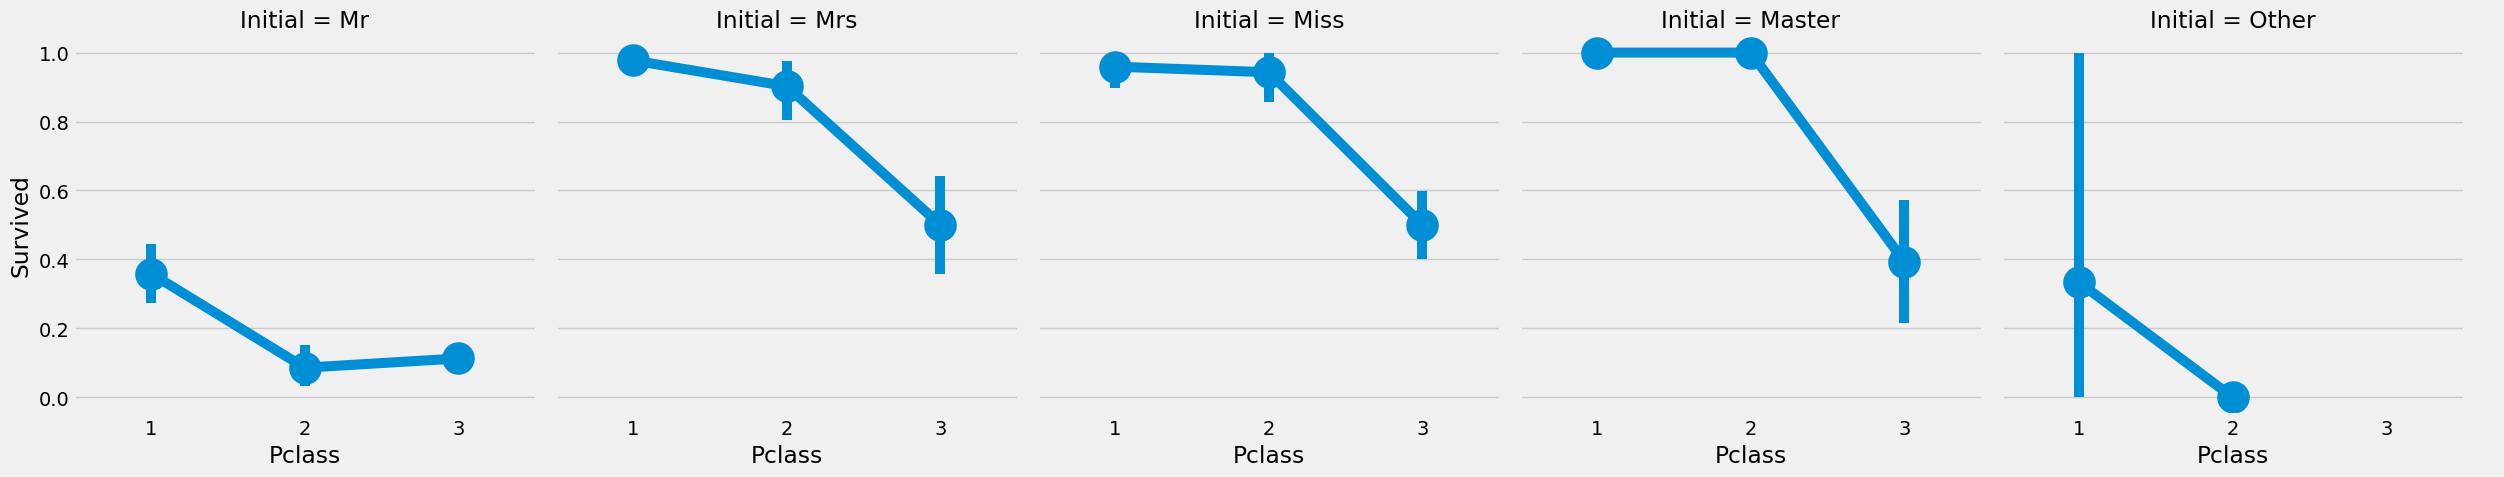

In [ ]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')
# → Seaborn의 범주형 시각화 함수 catplot을 사용
# → x축은 'Pclass' (객실 등급), y축은 'Survived' (생존 여부)
# → 'Initial' 값을 기준으로 그래프를 여러 개의 열로 나누어 그림 (facet)
# → kind='point'는 각 그룹의 평균값을 점과 선으로 연결하여 표시 (point plot)
# → data=data는 사용할 DataFrame 지정

# Embarked는 범주형 변수

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex, data.Survived],margins=True).style.background_gradient(cmap='summer_r')

# Chances for Survival by Port Of Embarkation

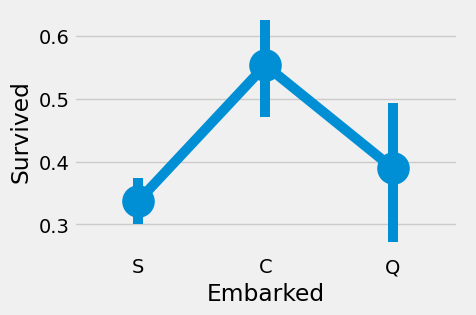

In [ ]:
sns.catplot(x='Embarked',y='Survived', data=data, kind = 'point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

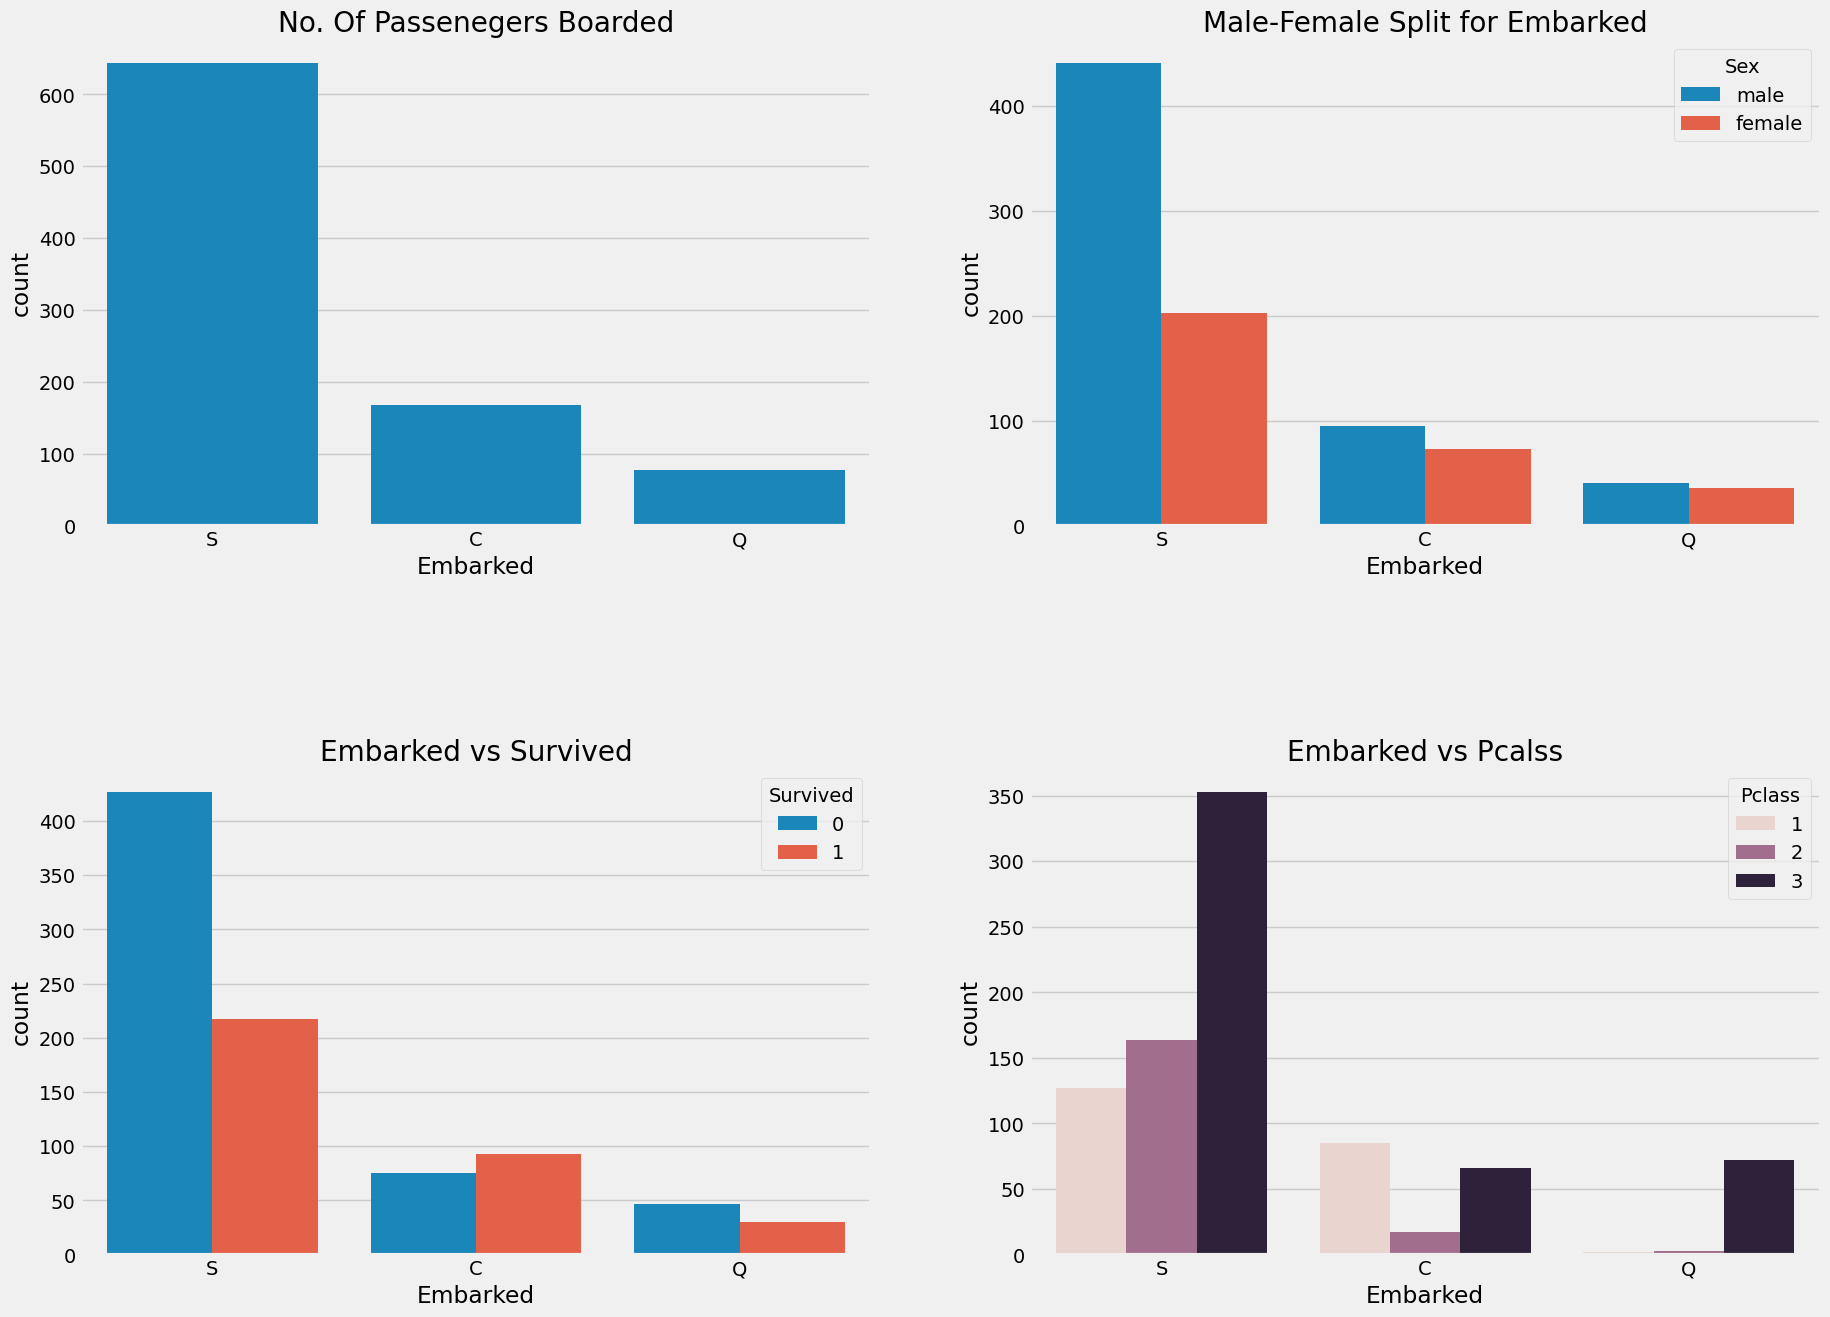

In [ ]:
f, ax = plt.subplots(2,2,figsize = (20, 15))
sns.countplot(x = 'Embarked', data = data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passenegers Boarded')
sns.countplot(x= 'Embarked', hue = 'Sex', data = data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x= 'Embarked', hue ='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x= 'Embarked', hue = 'Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pcalss')
plt.subplots_adjust(wspace=0.2
                    ,  # 서브플롯들 사이의 가로 간격 (width space) 설정. 값이 클수록 그래프들이 좌우로 멀어짐
                    hspace=0.5)  # 서브플롯들 사이의 세로 간격 (height space) 설정. 값이 클수록 위아래 여백이 많아짐
plt.show()

Observations:
1)Maximum passenegers boarded from S. Majority of them being from Pclass3.

2)The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.

3)The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

4)Port Q had almost 95% of the passengers were from Pclass3.

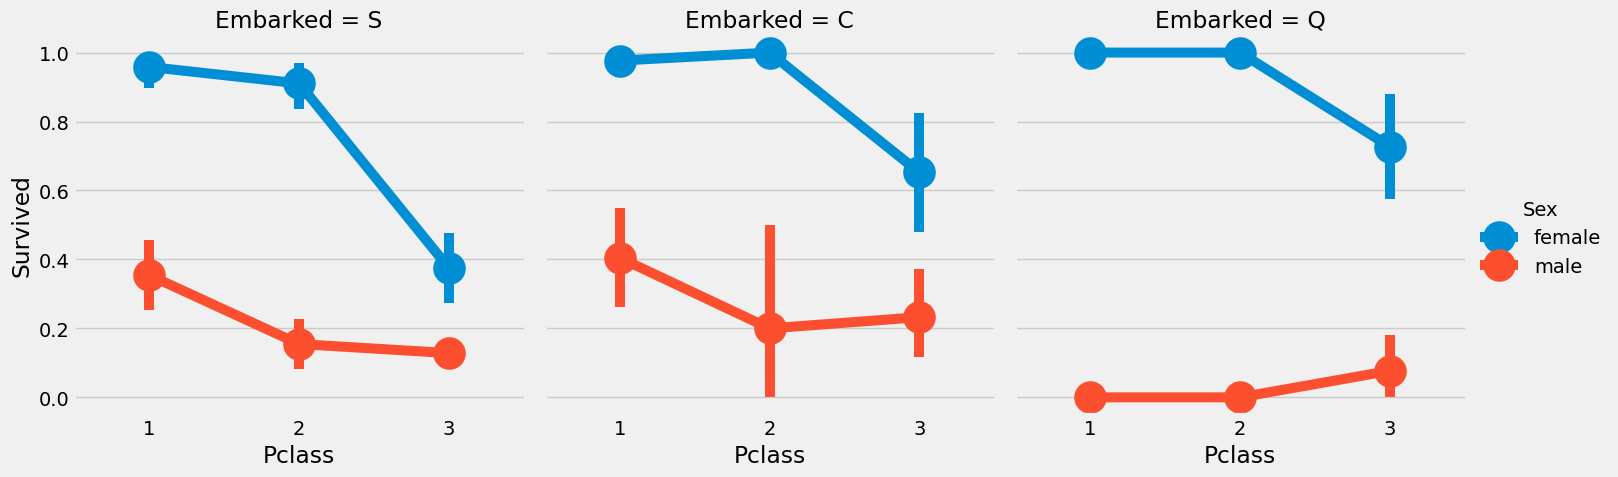

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue = 'Sex', col = 'Embarked', data=data, kind= 'point')
plt.show()

Observations:
1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.(Money Matters)

3)Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

# 항구 결측치 채우기(최빈값 'S'로)

In [ ]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

np.False_

# Sibsp는 이산형 변수

In [ ]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='Blues')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


#

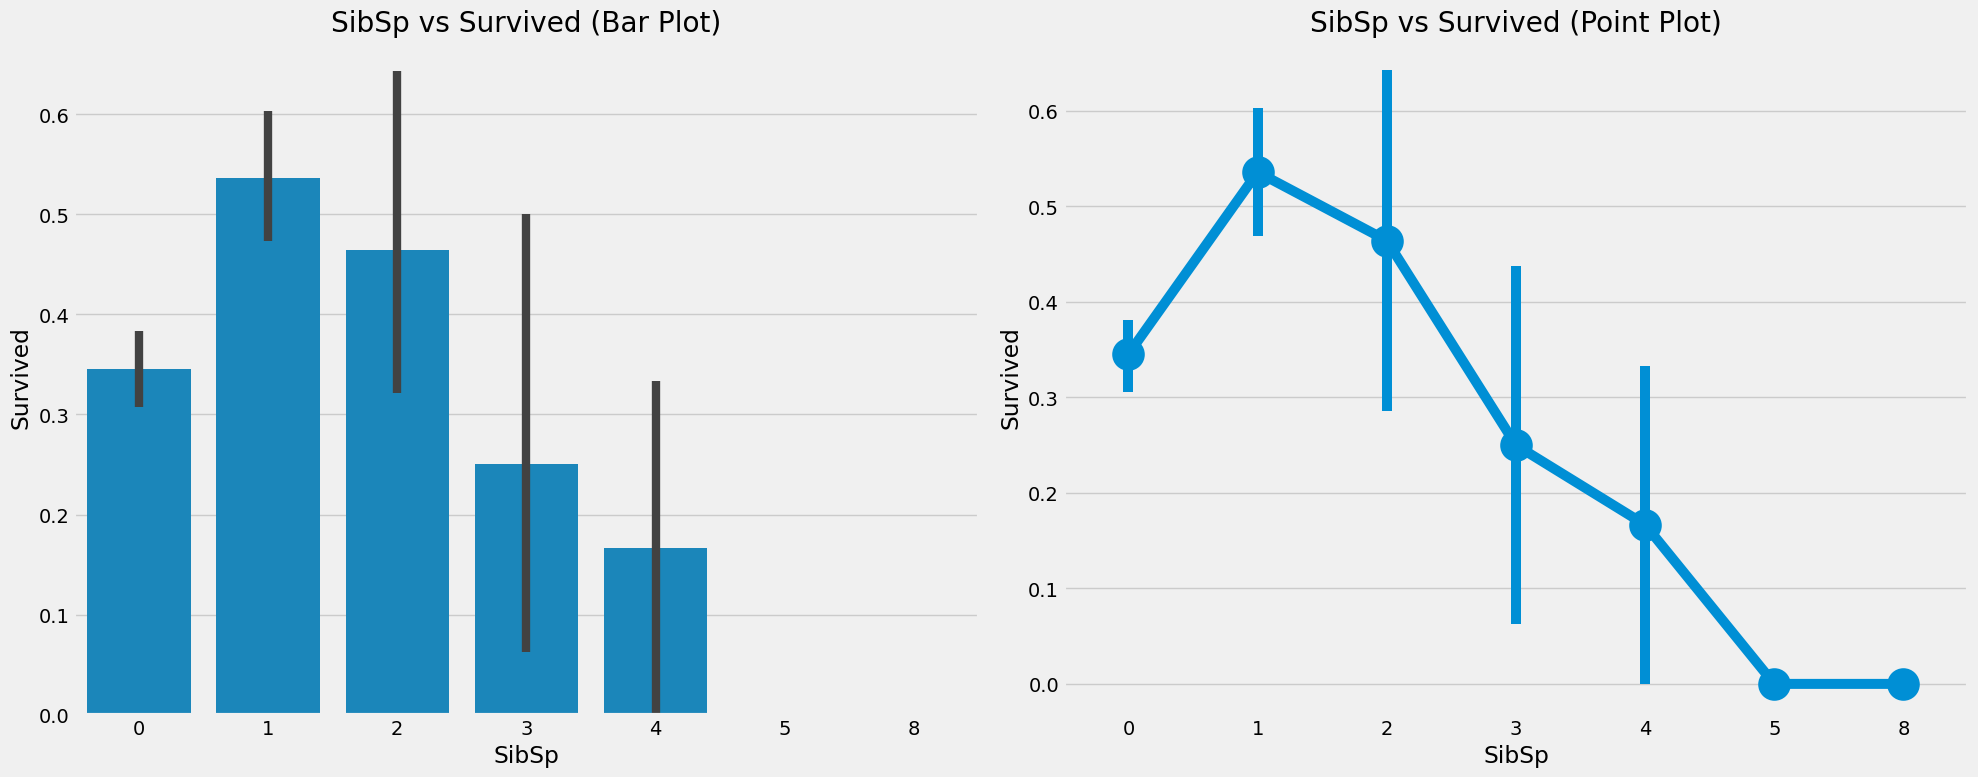

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# 왼쪽: barplot
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived (Bar Plot)')

# 오른쪽: pointplot (catplot 없이)
sns.pointplot(x='SibSp', y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived (Point Plot)')

plt.tight_layout()
plt.show()



Observations:
Here too the results are quite similar. Passengers with their sibsp onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

# 요금 ==> 연속형 변수

In [ ]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


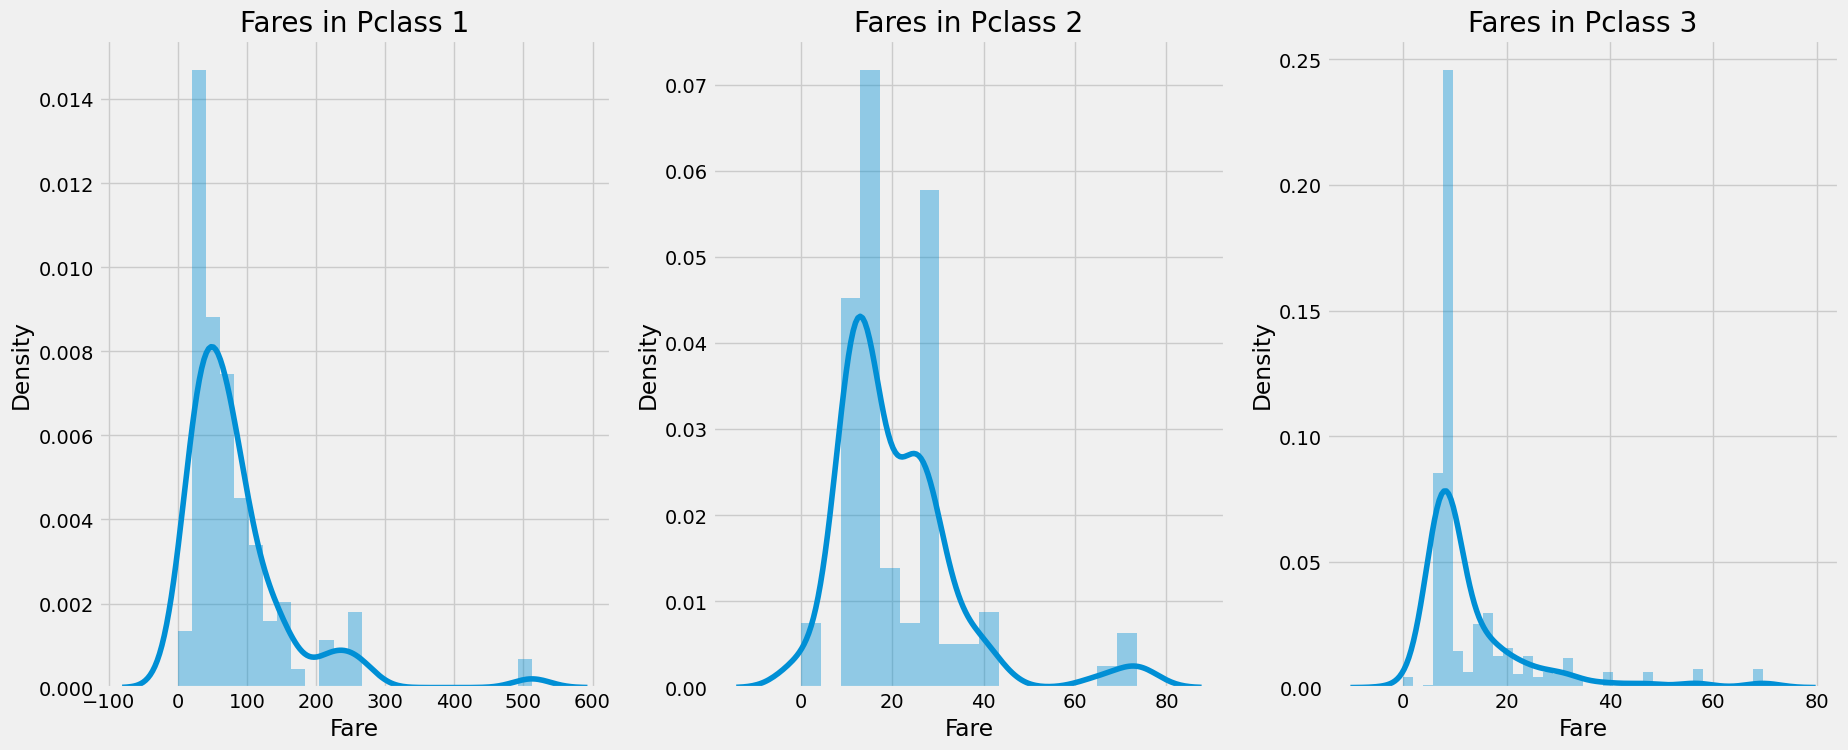

In [ ]:
f, ax = plt.subplots(1,3,figsize = (20, 8))
sns.distplot(data[data['Pclass'] == 1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

🟦 displot()이란?
displot은 distribution plot의 줄임말로, 데이터를 히스토그램(histogram), 커널 밀도 추정(KDE), 또는 둘 다를 함께 시각화할 수 있음

Pclass 1(1등급 객실) 승객들의 요금은 분포가 매우 넓게 퍼져 있는 것으로 보이며,
등급이 낮아질수록(2등급, 3등급) 요금 분포가 점점 좁아지는 경향을 보입니다.
요금은 연속형 변수이기 때문에, 구간(bin)을 나눠 이산형 변수로 변환하는 것이 가능

🧠 "Binning"이란?
**Binning (빈닝)**은 연속형 데이터를 일정한 구간으로 나누어 **범주형(이산형)**으로 바꾸는 기법


Observations in a Nutshell for all features:
Sex: The chance of survival for women is high as compared to men.

**Pclass:**There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

#피쳐들간의 상관관계

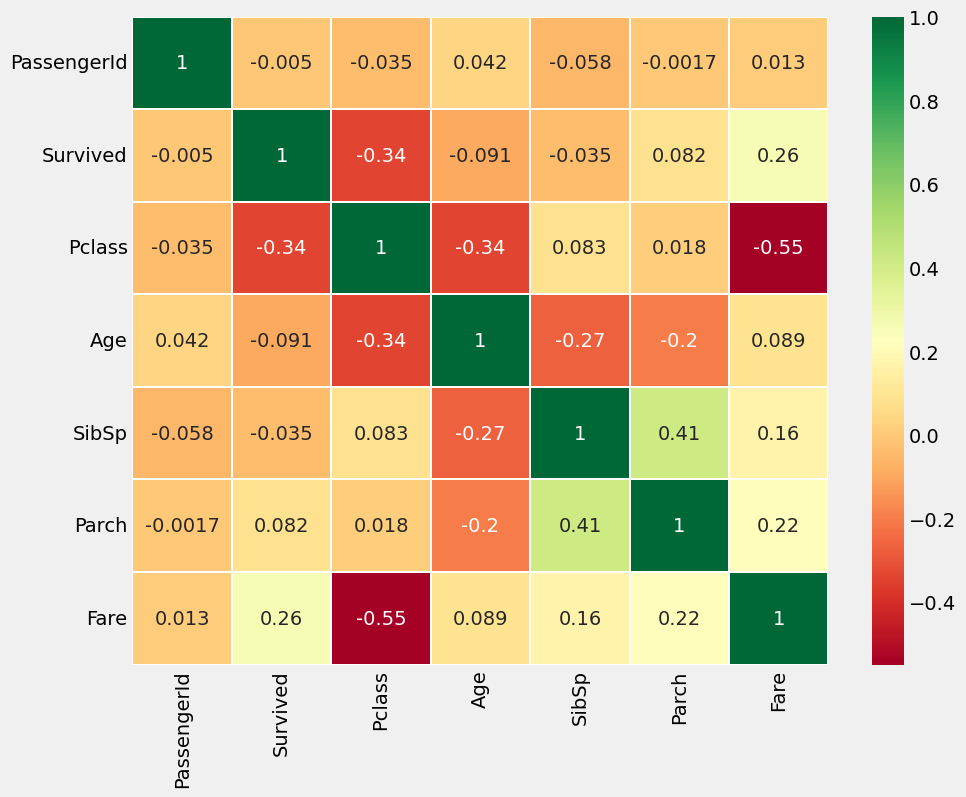

In [ ]:
# 수치형 데이터만 선택해서 상관관계 히트맵 그리기
sns.heatmap(data.select_dtypes(include='number').corr(),  # 숫자형 열만 선택
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2)

# 그래프 사이즈 설정
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.show()

  select_dtypes(include='number'):
Pandas의 기능으로, int, float 등 숫자형 열만 필터링
이걸 쓰면 문자열(string)이나 날짜(datetime) 같은 타입은 자동으로 제외
data.corr()에서 오류 없이 작동하게 해줌

🔥 히트맵 해석 요약
히트맵에서는 숫자형 변수들만 비교됩니다. 문자열(알파벳 등)끼리는 상관관계를 계산할 수 없습니다.

**상관관계(Correlation)**란 한 변수의 변화가 다른 변수에 어떤 영향을 미치는지를 나타냅니다.

✅ 양의 상관관계 (Positive Correlation)
A가 증가할 때 B도 증가 → 양의 상관관계

상관계수 1: 완벽한 양의 상관관계

✅ 음의 상관관계 (Negative Correlation)
A가 증가할 때 B는 감소 → 음의 상관관계

상관계수 -1: 완벽한 음의 상관관계

⚠️ 다중공선성 (MultiCollinearity)
두 변수가 너무 높은 상관관계를 가지면, 거의 같은 정보를 담고 있으므로 하나는 제거하는 것이 좋습니다.

다중공선성은 학습 시간 증가 등의 문제를 일으킬 수 있습니다.

✅ 이번 히트맵의 경우
대부분의 변수들 사이에 강한 상관관계는 없습니다.

가장 높은 상관계수는 SibSp와 Parch 사이의 0.41이며, 이는 큰 문제는 되지 않습니다.

따라서 모든 피처를 그대로 사용할 수 있습니다.

* 지피티 피셜) 상관계수 0.05 → 거의 무관

* 상관계수 0.42 → 어느 정도 상관

* 상관계수 0.85 → 강한 상관 → 중복 가능성 있음 → 하나 제거 고려


🛠️ Part 2: Feature Engineering & Data Cleaning 요약
✅ Feature Engineering이란?
주어진 데이터셋에서 모든 피처(feature)가 중요한 것은 아닙니다.

불필요하거나 중복된 피처는 제거하고,

다른 피처에서 유용한 정보를 추출하거나 가공하여 새로운 피처를 생성하는 작업입니다.

✅ 예시:
Name 컬럼에서 Initials(이니셜) 정보를 추출하는 것처럼,
기존 피처에서 의미 있는 새로운 피처를 생성할 수 있습니다.

✅ 이 단계에서 할 일
쓸모없는 피처 제거

새로운 피처 생성

기존 피처들을 예측 모델링에 적합한 형식으로 변환(인코딩 등)

🎯 Age_band: 나이 피처 처리
✅ 나이(Age) 피처의 문제점
나이는 **연속형 변수(Continuous Feature)**입니다.

연속형 변수는 머신러닝 모델에서 직접 사용하기에 분류나 그룹화가 어렵습니다.

📌 예시
성별(Sex)처럼 구분이 명확한 범주형 변수는 쉽게 그룹화할 수 있지만,

나이처럼 값이 다양하면, 예를 들어 사람 30명이 모두 서로 다른 나이라면 30개의 그룹이 생길 수 있어요. → 비효율적

✅ 해결 방법
연속형 변수를 범주형으로 바꾸는 방법:

Binning (구간 나누기)

정규화(Normalization)

여기서는 Binning을 사용할 예정입니다.

✅ Binning 방식
승객의 최대 나이가 80세였으므로, **0~80을 5개의 구간(bin)**으로 나눕니다.

즉, 80 ÷ 5 = 16,
→ 각 구간 크기는 16살씩!

In [ ]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16,'Age_band'] = 0
data.loc[(data['Age'] > 16) &(data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] =2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] =3
data.loc[data['Age'] > 64, 'Age_band' ] = 4
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='winter')

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


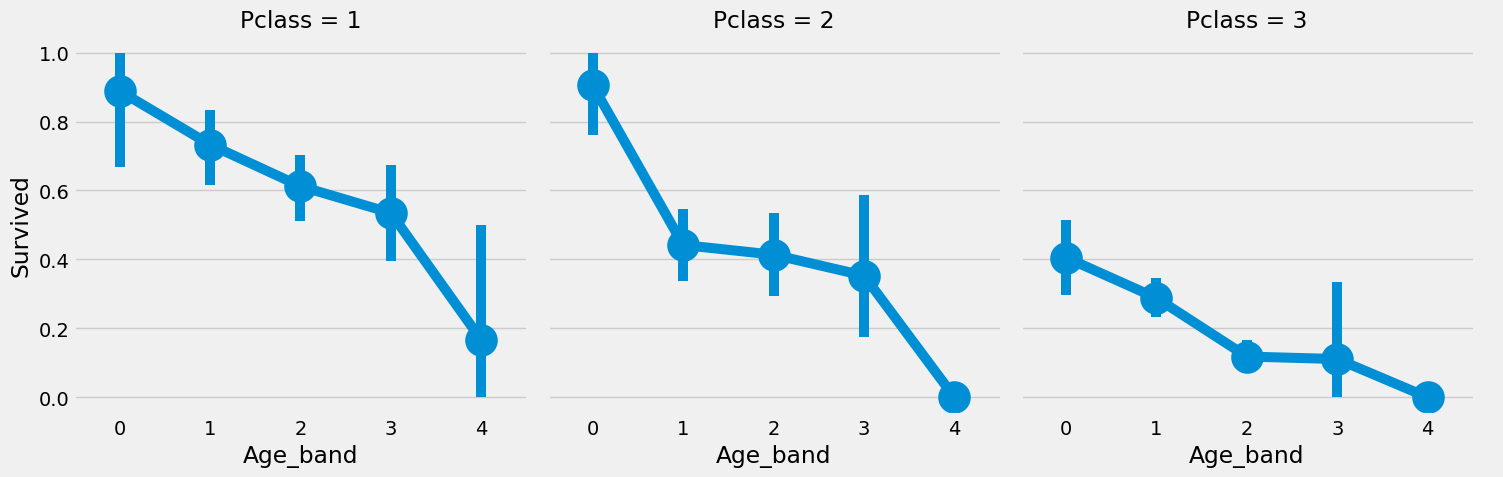

In [ ]:
sns.catplot(x= 'Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()

# Family_Size and Alone
At this point, we can create a new feature called "Family_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

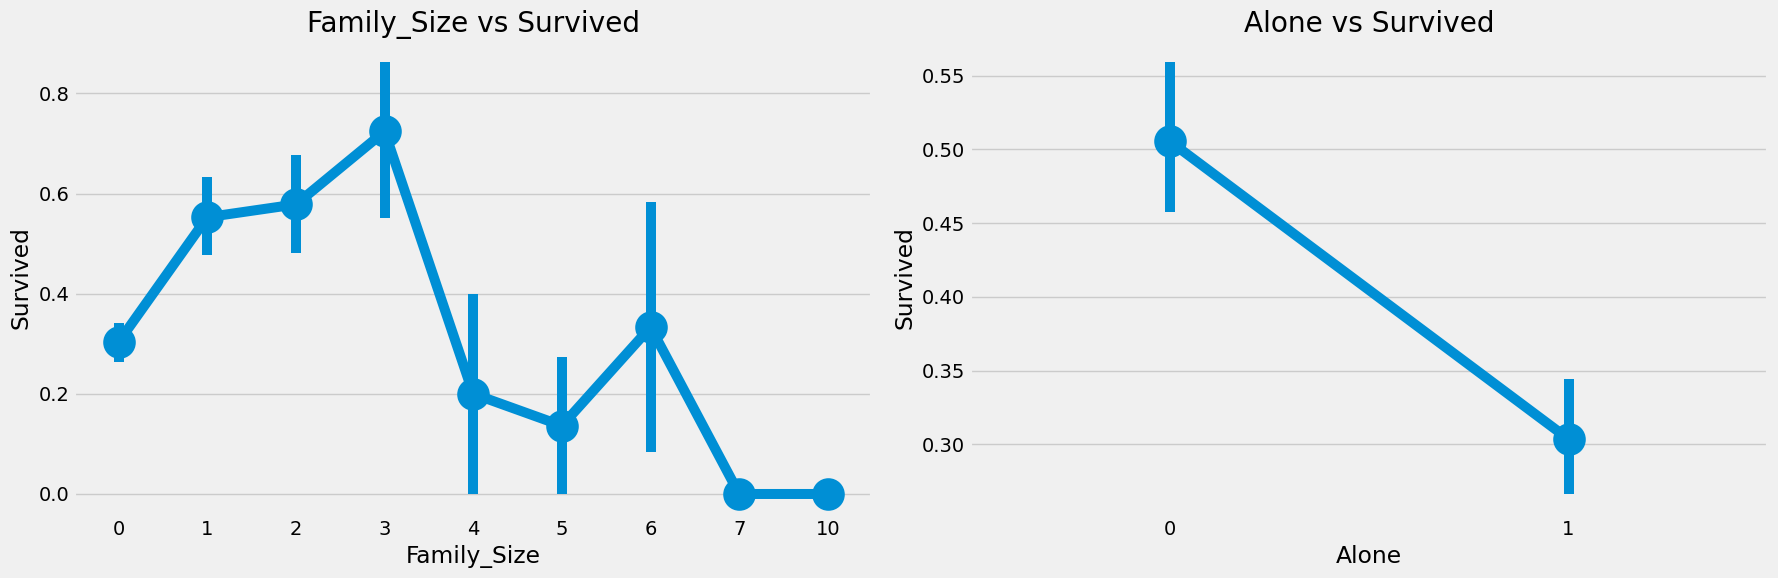

In [ ]:

# 새로운 피처 생성
data['Family_Size'] = data['Parch'] + data['SibSp']  # 부모/자녀 + 형제/배우자 수
data['Alone'] = 0                                    # 기본값 0
data.loc[data.Family_Size == 0, 'Alone'] = 1         # 가족이 없는 경우 Alone = 1

# subplot 생성
f, ax = plt.subplots(1, 2, figsize=(18, 6))

# 첫 번째 그래프: 가족 크기와 생존률의 관계
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

# 두 번째 그래프: 혼자인 승객과 생존률의 관계
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

# 그래프 표시
plt.tight_layout()
plt.show()

Family_Size는 가족 수를 의미

Alone은 혼자인지 여부를 나타내는 이진 변수(0 또는 1)

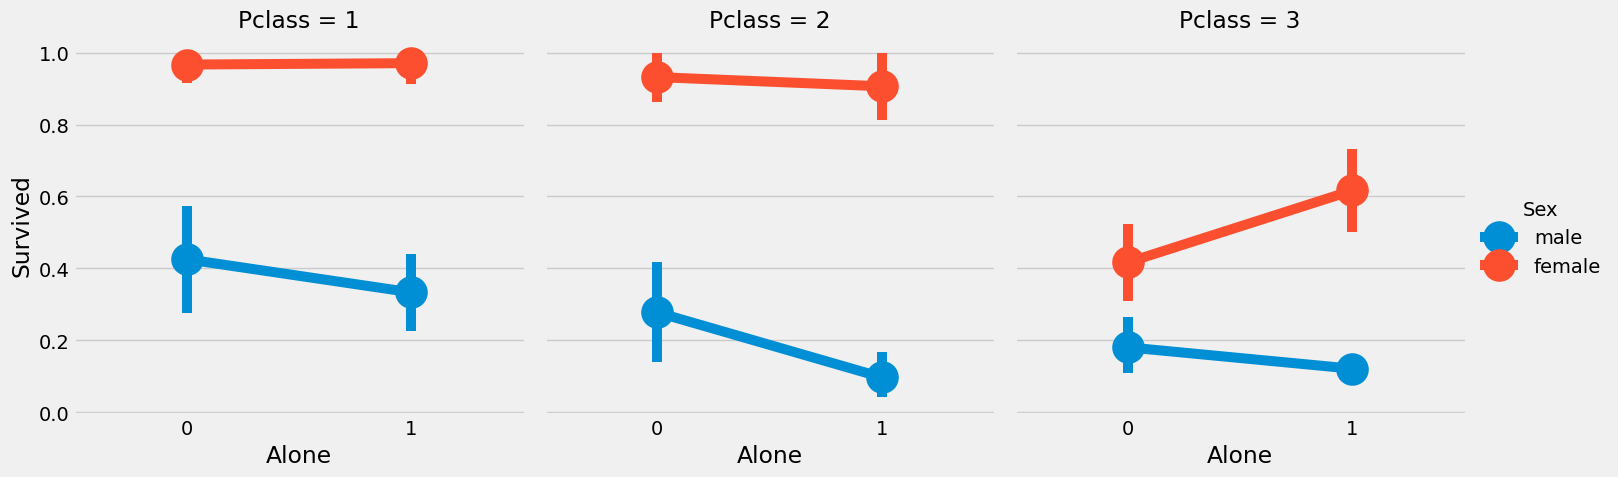

In [ ]:
sns.catplot(x= 'Alone', y='Survived', data=data, hue='Sex', col= 'Pclass', kind = 'point')
plt.show()

# Fare_Range
Fare는 연속형이라 직접 사용하기 어려움

qcut을 사용하여 **구간(bin)으로 나누고 순서가 있는 값(ordinal)**으로 변환

In [ ]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4) # 1. Fare(운임요금)를 4개의 분위수 구간으로 나눠서 Fare_Range라는 새 열 생성
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


# pd.cut()과 pd.qcut()
연속형 데이터를 구간으로 나누어 범주형 데이터로 바꾸는 함수  
머신러닝 전처리나 EDA에서 아주 자주 쓰이는 기능  
pd.cut() – 값의 범위에 따라 균등하게 자름  
pd.qcut() – **데이터 개수(분위수)**를 기준으로 나눔  

📘 실전에서는 pd.qcut()이 데이터가 한쪽으로 쏠려 있을 때(왜도) 더 유리하고,
pd.cut()은 **해석이 명확한 구간(예: 나이)**을 쓸 때 좋음

As discussed above, we can clearly see that as the fare_range increases, the chances of survival increases.

Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [ ]:
data['Fare_cat']= 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454)&(data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31)&(data['Fare'] <= 513), 'Fare_cat'] = 3

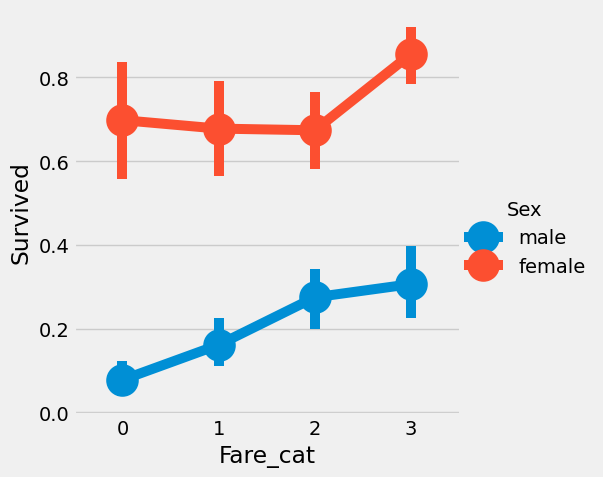

In [ ]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

# Converting String Values into Numeric  
Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc into numeric values.

In [ ]:
data['Sex'].replace(['male', 'female'],[0,1],inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace= True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0,1,2,3,4], inplace = True)

# Dropping UnNeeded Features
Name--> We don't need name feature as it cannot be converted into any categorical value.

Age--> We have the Age_band feature, so no need of this.

Ticket--> It is any random string that cannot be categorised.

Fare--> We have the Fare_cat feature, so unneeded

Cabin--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

Fare_Range--> We have the fare_cat feature.

PassengerId--> Cannot be categorised.

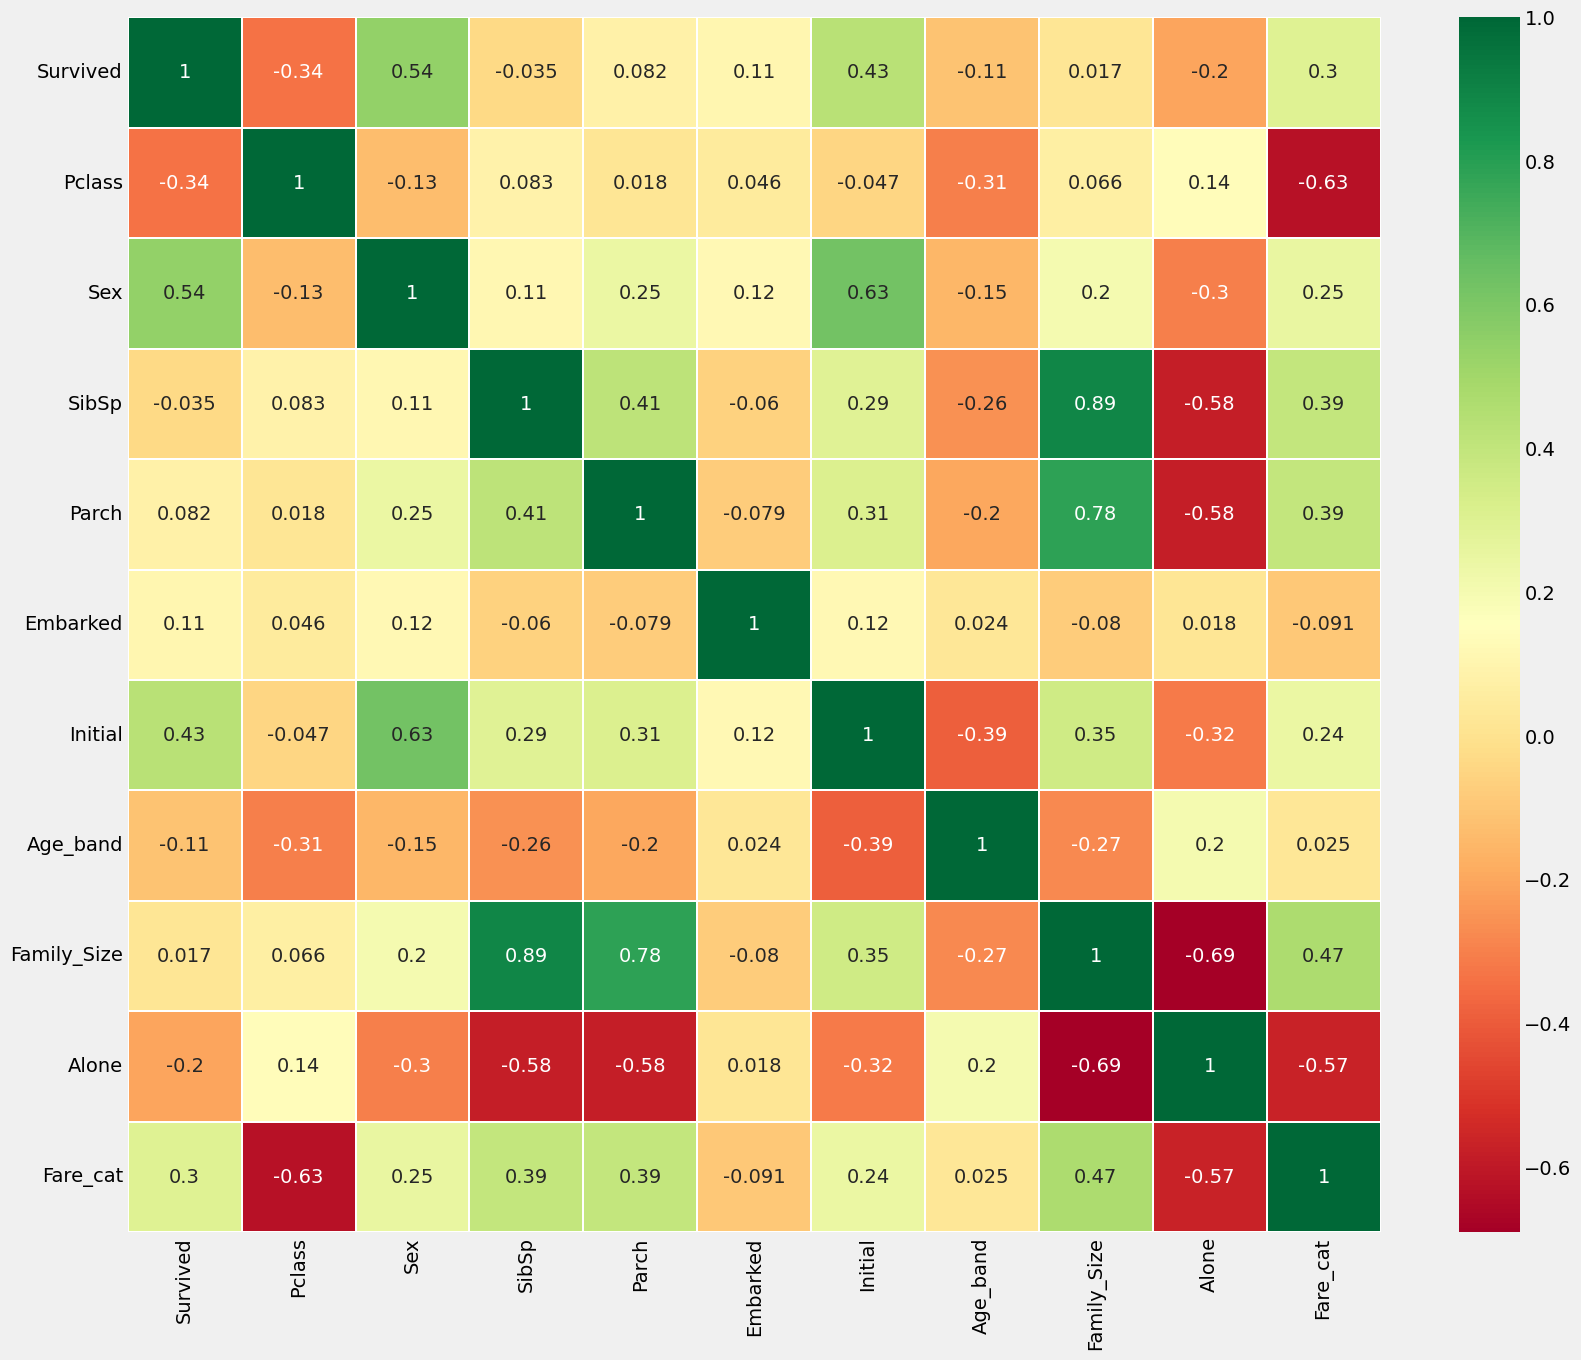

In [ ]:

data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],
          axis=1,
          inplace=True,
          errors='ignore')  # ❗ 에러 무시 옵션


# 상관계수 히트맵 그리기
sns.heatmap(data.corr(),                   # 수치형 열들의 상관계수 행렬
            annot=True,                    # 셀 안에 수치 표시
            cmap='RdYlGn',                 # 색상 맵 (빨강~노랑~초록)
            linewidths=0.2,                # 셀 경계선 두께
            annot_kws={'size': 14})        # 수치 폰트 크기 설정 (여기서 kws: keyword settings)

# 그래프 사이즈 조정
fig = plt.gcf()
fig.set_size_inches(18, 15)

# x축, y축 폰트 크기 조정
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# 그래프 출력
plt.show()


# errors='ignore' 옵션 추가
존재하지 않는 열은 무시하고, 존재하는 열만 삭제

# intersection

**두 집합(Set 또는 리스트)의 공통된 항목(교집합)**만 추려주는 개념
데이터 분석에서 특히 데이터프레임의 컬럼 중 존재하는 항목만 필터링할 때 아주 유용하게 쓰임  

a = ['Name', 'Age', 'Fare']
b = ['Fare', 'Cabin', 'Sex']

set(a).intersection(set(b))  
결과: {'Fare'}


## Part3: Predictive Modeling  

우리는 EDA(탐색적 데이터 분석)를 통해 몇 가지 인사이트를 얻었지만,
그것만으로는 승객이 생존할지 사망할지를 정확히 예측할 수는 없습니다.

그래서 이제는 본격적으로 분류(Classification) 알고리즘을 사용하여
승객이 생존할지 여부를 예측하는 모델을 만들 것입니다.

# ✅ 사용할 머신러닝 분류 알고리즘
로지스틱 회귀(Logistic Regression)

서포트 벡터 머신(SVM) – 선형(Linear) 및 비선형(Radial)

랜덤 포레스트(Random Forest)

K-최근접 이웃(K-Nearest Neighbours, KNN)

나이브 베이즈(Naive Bayes)

의사결정나무(Decision Tree)


In [ ]:
# 1. 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터를 훈련셋(train)과 테스트셋(test)으로 7:3 비율로 분리
# stratify=data['Survived']: 생존자 비율을 유지하며 분리 (클래스 불균형 방지)
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

# 훈련용 입력 데이터 (train의 첫 번째 열 제외한 나머지 열들)
train_X = train[train.columns[1:]]  # 예: 'Survived' 열이 맨 앞이라고 가정한 것

# 훈련용 정답(타겟) 데이터 → 첫 번째 열
train_Y = train[train.columns[:1]]  # 예: 첫 열이 'Survived'일 경우

# 테스트 입력 데이터
test_X = test[test.columns[1:]]

# 테스트 정답 데이터
test_Y = test[test.columns[:1]]

# 전체 데이터의 입력값 (첫 번째 열 제외)
X = data[data.columns[1:]]

# 전체 데이터의 정답값 (Survived 열 직접 지정)
Y = data['Survived']


# ✅ random_state=0란?
데이터셋을 무작위로 섞어서 훈련용과 테스트용으로 나눌 때 사용하는 "랜덤 시드(seed)" 설정  

파이썬이나 머신러닝 알고리즘은 무작위(random)로 데이터를 섞을 때 **난수 생성기(random number generator)**를 사용.

이 난수 생성기의 시작점이 되는 값이 바로 seed, 즉 random_state임  
같은 random_state 값을 주면 항상 동일한 방식으로 분할

실험 결과를 재현 가능하게(reproducible) 만들기 위한 설정

0은 "랜덤 시드(seed)" 값 중 하나일 뿐 특별한 뜻이 있는 숫자는 아님  
즉, random_state=0은 그냥 시드를 0으로 고정했다는 것

#✅ stratify=data['Survived']란?
데이터를 나눌 때, **Survived 변수의 클래스 비율(0과 1의 비율)**을 훈련셋과 테스트셋에서 동일하게 유지하도록 해주는 옵션

즉, 생존자와 사망자의 비율이 전체와 동일하게 유지되도록 분리해줌

비율이 맞춰지기 때문에, 테스트셋이 편향되지 않고 훈련된 모델의 성능을 정확히 평가할 수 있음


# Radial Support Vector Machines(rbf-SVM) 네?

In [ ]:
from sklearn import metrics  # 평가 지표(metrics) 함수들을 불러옴 (정확도, F1 등)
from sklearn import svm      # SVM 모델(Support Vector Machine) 불러오기

# rbf 커널을 사용하는 SVM 모델 정의
model = svm.SVC(kernel='rbf',   # 'rbf'는 비선형 데이터를 처리하기 위한 방사 기저 함수 커널
                C=1,            # 정규화 파라미터 (오차 허용 정도, 클수록 복잡한 모델)
                gamma=0.1)      # 커널 함수의 영향 범위 (작을수록 멀리까지 영향, 클수록 국소적)

# 모델 학습 (훈련 데이터로)
model.fit(train_X, train_Y)

# 테스트 데이터로 예측 수행
prediction1 = model.predict(test_X)

# 예측 정확도 출력
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))


Accuracy for rbf SVM is  0.835820895522388


# ✅ 1. 평가지표 (Evaluation Metrics)
모델이 얼마나 잘 예측했는지를 평가하는 기준  
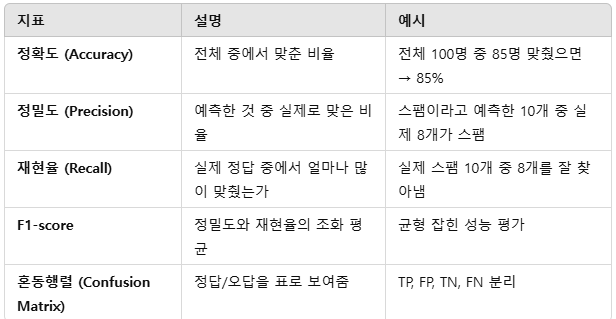

#✅ 2. SVM 모델이란?
**SVM(Support Vector Machine)**은 데이터를 분류하는 아주 강력한 알고리즘

간단히 말해, 두 클래스를 가장 잘 나눌 수 있는 선(또는 면)을 찾는 것

이 선을 **결정 경계(Decision Boundary)**라고 함
이 선과 가장 가까운 데이터들을 **Support Vectors(지지 벡터)**라고 부름

#✅ 3. 커널 함수(Kernel Function)란?
선형으로 나눌 수 없는 데이터를 고차원 공간으로 변형해서 선형 분리가 가능하게 해주는 함수

# ✅ 4. rbf란?
RBF (Radial Basis Function)

가장 널리 쓰이는 커널 함수

원형(방사형)으로 퍼지는 영향력을 가진 커널로, 비선형 데이터를 잘 분리함

kernel='rbf'는 SVM에서 비선형 분류를 할 때 기본값

#✅ 5. 비선형 데이터란?
선(직선, 평면 등) 하나로 두 클래스를 나눌 수 없는 데이터

예:
직선으로는 나눌 수 없고, 곡선이나 원형 경계가 필요한 분포


#✅ 6. 방사 기저 함수 커널 (RBF 커널)이란?
각 데이터 포인트를 중심으로 주변 데이터에 영향을 주는 곡선(벨 모양)을 만든다고 생각하면 됨
RBF 커널은 가까운 데이터에 더 큰 영향, 멀리 있는 데이터는 영향 적게

이를 통해 복잡한 비선형 경계를 그릴 수 있음


#✅ 7. 정규화 파라미터 C란?
모델이 오차를 얼마나 허용할지를 정하는 값입니다.

❗ C값이 작을수록 → 오차에 더 관대해지고 → 규제는 더 강해집니다.
C 값이 클수록	오차를 줄이려 하고 	복잡한 모델 (과적합 위험)     

✅ 용어 먼저 정리
규제(Regularization):
→ 모델이 너무 복잡해지지 않도록 제약을 주는 것
→ 예: 가중치(w)를 너무 크지 않게 제한  

오차(Total loss):
→ 모델이 훈련 데이터를 얼마나 잘 맞추지 못했는지를 나타냄 (예측 오류)

📍 적절한 C 값 찾는 것이 모델 성능에 중요!

#✅ 8. gamma란?
데이터 포인트 하나가 미치는 영향 범위를 조절하는 값

gamma 값이 작을수록	영향이 멀리까지 퍼짐 (부드러운 결정 경계)  
클수록	영향이 가까운 곳에만 있음 (복잡한 결정 경계)
→ 너무 크면 과적합, 너무 작으면 성능이 낮아질 수 있음

# Linear Support Vector Machine(linear-SVM) 네?


In [ ]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)  # 선형 커널을 사용하는 SVM 모델 생성, C=0.1은 단순한 경계, gamma는 linear에선 무시됨
model.fit(train_X, train_Y)                         # 훈련 데이터로 SVM 모델 학습
prediction2 = model.predict(test_X)                 # 테스트 데이터로 생존 여부 예측
print('Accuracy for linear SVM is',                 # 출력 문장 시작
      metrics.accuracy_score(prediction2, test_Y))  # 예측값과 실제값을 비교해 정확도 계산 및 출력

Accuracy for linear SVM is 0.8171641791044776


# ✅ fit()의 의미
fit()은 모델을 학습(train) 시키는 함수  
즉, **입력 데이터(X)**와 **정답(label 또는 y)**를 가지고,
👉 모델이 패턴을 배우는 과정을 실행하는 함수

# ✅ "어떤 모델이 더 잘 맞는지(정확도가 높은지) 비교해보려는 것"입니다!  
🎯 이유를 정리해보면:
데이터의 분포가 선형인지 비선형인지 우리가 직접 눈으로는 완전히 판단하기 어려워요.
→ 그러니까 Linear 모델도, 비선형 모델도 모두 실험해보는 게 좋습니다.

모델마다 데이터를 분류하는 방식이 다르기 때문에,
같은 데이터에 적용해도 결과(정확도)가 달라질 수 있어요.

특히 타이타닉 데이터는:

일부 변수는 선형처럼 보일 수 있고 (예: Sex, Pclass)

일부는 곡선적인 경계가 더 적합할 수도 있어요 (예: Age, Fare 조합 등)

# ✅ 실무에서도 이렇게 합니다!
여러 모델을 실험해보고,

가장 성능이 좋은 모델을 선택해 사용합니다.

이걸 "모델 선택(Model Selection)"이라고 해요.



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


## ✅ 로지스틱 회귀란?
어떤 결과가 '참(True, 1)'일 확률을 예측하는 머신러닝 모델
특히 결과가 **이진 분류(0 또는 1)**일 때 주로 사용

예:
타이타닉 생존 예측: 생존(1) or 사망(0)

이메일 스팸 분류: 스팸(1) or 일반(0)

질병 진단: 있음(1) or 없음(0)

## ✅ 어떻게 작동하나?
1. 선형 회귀처럼 입력값 × 가중치 + 절편을 계산

2. 그 결과값을 시그모이드 함수에 넣어서

3. 0과 1 사이의 확률값을 출력

4. 확률이 0.5 이상이면 1, 아니면 0으로 분류합니다

## cf) ✅  선형 회귀란?
**하나 또는 여러 변수(X)**로부터 **연속적인 숫자값(y)**을 예측하는 모델입니다.
예: 공부시간 → 시험 점수 예측, 집 크기 → 가격 예측
📈 시각적으로 보면:
점들이 흩어져 있는 그래프에서 **가장 잘 맞는 직선(선형 함수)**을 찾는 것!

## cf) ✅ 2. 시그모이드 함수란? (Sigmoid Function)
어떤 숫자(예: 선형 회귀 결과)를 받아서 0과 1 사이의 확률값으로 바꿔주는 함수입니다.
로지스틱 회귀, 신경망 등에서 이진 분류할 때 자주 사용됩니다.

📈 시각적으로 보면:
S자 곡선을 그리며,

z가 커지면 결과는 1에 가까워지고

z가 작아지면 결과는 0에 가까워집니다

## cf) ✅ 선형 회귀 + 시그모이드 = 로지스틱 회귀
로지스틱 회귀는 이렇게 구성돼요:

선형 회귀처럼 계산 → z = wx + b

시그모이드 함수에 넣음 → P = 1 / (1 + e^(-z))

P가 0.5 이상이면 1 (예: 생존), 아니면 0 (사망)으로 예측

## 🧠 요약하면
선형 회귀: 입력값으로 직선을 만들어 숫자를 예측

시그모이드 함수: 숫자를 받아서 **0~1 사이의 값(확률)**로 바꿈

로지스틱 회귀 = 선형 회귀 + 시그모이드 → 분류 모델




## ✅ 로지스틱 회귀는 언제 쓰나?
✔ 아래 조건 중 하나라도 해당되면 적합합니다:

예측하려는 결과가 이진(0/1) 클래스일 때

빠르고 해석이 쉬운 모델이 필요할 때

데이터가 비교적 선형적일 때

모델을 해석하고 설명해야 할 때
(예: 어떤 변수가 생존에 얼마나 영향을 줬는지)


## ✅ 장점
속도 빠름 (대규모 데이터에 적합)

해석이 쉬움 (회귀 계수로 영향력 분석 가능)

과적합 위험 낮음

학습 과정이 안정적

## ❗ 단점
비선형 분포는 잘 처리하지 못함
(복잡한 패턴에는 SVM, RandomForest, NeuralNet 등이 더 좋을 수 있음)

상호작용(변수 간 관계)을 잘 반영하지 못함

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()                         # 결정 트리 모델 객체 생성 (기본 하이퍼파라미터 사용)
model.fit(train_X, train_Y)                              # 훈련 데이터를 이용해 모델 학습 (생존 여부 학습)
prediction4 = model.predict(test_X)                      # 테스트 데이터에 대해 생존 여부 예측 수행
print('The accuracy of the Decision Tree is',            # 출력 문장 시작
      metrics.accuracy_score(prediction4, test_Y))       # 예측값과 실제값 비교하여 정확도 계산 및 출력

The accuracy of the Decision Tree is 0.8059701492537313


##✅ 1. 결정 트리(Decision Tree)란?
데이터를 **조건문(예: if-else)**처럼 반복적으로 분기하면서
**결과(예측값)**를 도출하는 머신러닝 모델  
"질문"을 통해 데이터를 나누며 결정 노드를 만들어감
마지막 결과는 **리프 노드(leaf node)**에 도달함
🔍 장점
사람이 읽고 이해하기 쉬움

전처리가 거의 필요 없음

빠름

⚠️ 단점
과적합(overfitting)에 취약함

작은 데이터 변화에도 구조가 많이 바뀔 수 있음

## ✅ 2. 기본 하이퍼파라미터란? (예시는 나중에...)
모델의 구조나 학습 방법을 조절하는 설정값을 의미  
DecisionTreeClassifier()에 아무 옵션도 넣지 않으면, 기본값(default) 하이퍼파라미터로 동작  
이 하이퍼파라미터를 조정함으로써 성능 향상 또는 과적합 방지가 가능


# K-Nearest Neighbours(KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8134328358208955


## ✅ KNN이란?
K-최근접 이웃 (K-Nearest Neighbors)
입력한 데이터가 어떤 클래스에 속하는지를 판단할 때,
주변에 가장 가까운 K개의 이웃을 보고 다수결 투표로 결정하는 비모수적(non-parametric) 모델입니다.

## 🎯 어떻게 작동하나요?
예측하고 싶은 새로운 데이터 포인트가 생김

기존 학습 데이터에서 가장 가까운 K개의 이웃을 찾음

그 이웃들이 어떤 클래스에 속해 있는지 확인

가장 많이 속한 클래스로 예측!  

파라미터	설명  
n_neighbors : 몇 명의 이웃을 참고할지 (K 값)  
metric : 	거리 계산 방식 (기본: 유클리드 거리)    
weights : 	각 이웃의 가중치 (uniform or distance)  

## 📈 K 값에 따른 특징
K가 작을수록 → 모델은 민감하고 과적합될 수 있음

K가 클수록 → 모델은 부드러워지며 일반화됨 (하지만 너무 크면 정확도 저하)

*KNN을 사용할 땐 반드시 특성 스케일링(StandardScaler) 을 해주는 게 좋습니다*

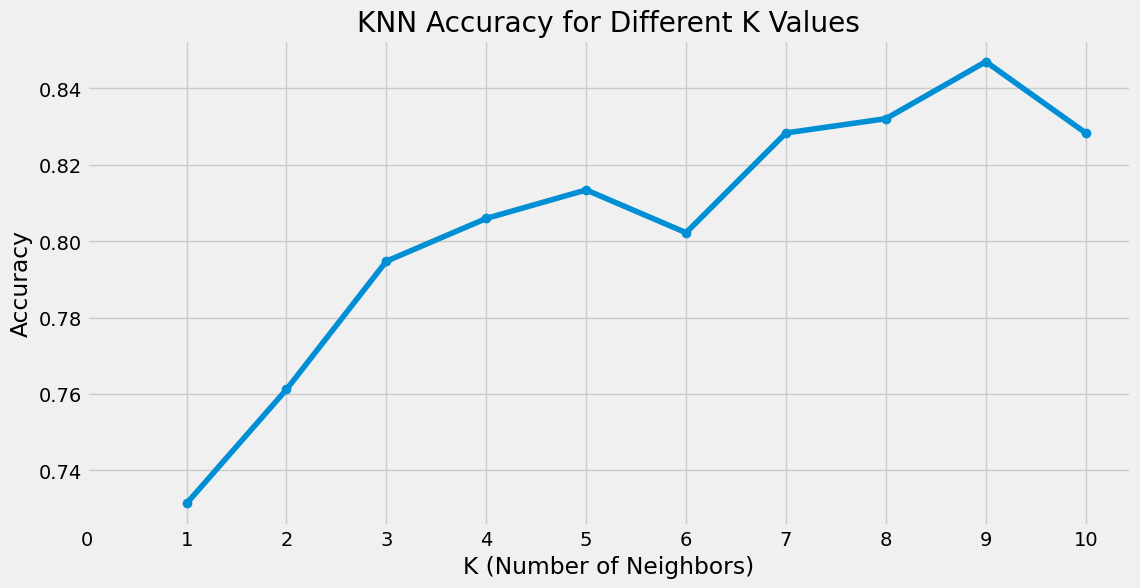

Accuracies for different values of K: [0.7313432835820896, 0.7611940298507462, 0.7947761194029851, 0.8059701492537313, 0.8134328358208955, 0.8022388059701493, 0.8283582089552238, 0.832089552238806, 0.8470149253731343, 0.8283582089552238]
Maximum Accuracy: 0.8470149253731343


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

a_index = list(range(1, 11))          # K 값 (1~10)
accuracies = []                       # 정확도 저장 리스트
x = list(range(0, 11))                # x축 눈금

for i in a_index:
    model = KNeighborsClassifier(n_neighbors=i)    # K값 설정
    model.fit(train_X, train_Y)                    # 모델 학습
    prediction = model.predict(test_X)             # 예측
    acc = metrics.accuracy_score(test_Y, prediction)  # 정확도 계산
    accuracies.append(acc)                         # 리스트에 추가

# 시각화
plt.plot(a_index, accuracies, marker='o')
plt.xticks(x)
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.grid(True)
plt.show()

# 출력
print('Accuracies for different values of K:', accuracies)
print('Maximum Accuracy:', max(accuracies))


## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))


The accuracy of the NaiveBayes is 0.8134328358208955


# ✅ 1. GaussianNB란?
GaussianNB는 나이브 베이즈(Naive Bayes) 분류기의 한 종류  
데이터가 **정규분포(가우시안 분포)**를 따른다고 가정하고 작동하는 알고리즘

#  ✅ 2. 나이브 베이즈란?
**베이즈 정리(Bayes' Theorem)**를 기반으로 만든 분류 알고리즘

어떤 데이터가 주어졌을 때, 그 데이터가 어떤 클래스에 속할 확률을 계산해서 확률이 가장 높은 클래스로 분류

# ✅ 3. 왜 "나이브(naive)"일까?
모든 특성(feature)들이 서로 독립적이라고 가정하기 때문    
예: 성별과 나이, 객실 등급이 서로 관련이 없다고 가정  
현실에선 독립이 아닐 수 있지만, 이 단순한 가정으로도 꽤 정확한 예측이 가능함

# ✅ 4. GaussianNB의 특징
입력 데이터가 연속형 수치형일 때 사용   

각 특성이 **정규분포(종 모양 곡선)**을 따른다고 가정  .

빠르고 계산량이 적음  

대용량 데이터나 실시간 예측에 적합

# ✅ 5. 언제 쓰면 좋을까?
특성이 연속형일 때 (예: 나이, 요금, 점수 등)

데이터가 비교적 간단할 때

빠른 모델이 필요할 때

예: 타이타닉 생존 예측, 스팸 이메일 분류, 질병 진단 등

# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8208955223880597


# ✅ 1. RandomForestClassifier란?
여러 개의 **결정 트리(Decision Tree)**를 만들고,
그 결과를 투표(Voting) 해서 최종 예측을 결정하는 앙상블(Ensemble) 모델

즉, 하나의 나무(tree)가 아니라 **숲(forest)**을 만들어서 예측하는 강력한 분류기

# ✅ 2. 왜 "랜덤(Random)"일까?
랜덤 포레스트는 훈련 중에 **무작위성(randomness)**을 도입  
각 트리를 훈련할 때 데이터의 일부만 샘플링해서 사용

각 분할(split)마다 특성(feature)의 일부만 랜덤하게 선택해서 분할

👉 이로 인해 각 트리가 서로 조금씩 다르게 학습되고, 전체적으로 과적합을 방지

# ✅ 3. 핵심 개념 요약
여러 결정 트리를 만들고,

각각 예측을 수행한 뒤,

다수결 투표(분류) 또는 평균(회귀) 으로 최종 결과 도출

#✅ 4. 장점
매우 강력하고 정확도가 높음

과적합에 강함 (여러 트리의 평균이라 안정적)

특성 중요도(feature importance) 확인 가능

전처리가 적게 필요함 (스케일링 불필요)

#✅ 5. 단점
모델이 커지고 느릴 수 있음

해석이 어려움 (트리 하나는 쉽지만, 수십~수백 개면 복잡해짐)

실시간 예측이 필요한 경우에는 부적합할 수 있음

#  K-Fold Cross Validation

🔁 K-Fold Cross Validation이란?
전체 데이터를 **K개의 동일한 크기의 부분(fold)**으로 나눈 후, 다음과 같은 과정을 반복하는 방식

K개의 fold 중 하나를 검증용 데이터로 사용

나머지 K-1개의 fold를 훈련용 데이터로 사용

이 과정을 K번 반복해서, 모든 fold가 한 번씩 검증용으로 사용되게 함

K번의 평가 결과(예: 정확도, RMSE 등)를 평균내어 최종 성능 평가로 삼음

✅ 장점
데이터가 적을 때도 효율적인 모델 평가 가능

과적합(overfitting) 방지에 도움

데이터 분할에 따른 우연한 결과 편향을 줄임

⚠️ 단점
K번 모델을 훈련해야 하므로 계산 비용이 큼

너무 큰 K를 사용하면 fold당 데이터가 적어져서 분산이 커질 수 있음

💡 보통 K 값은?
K=5 또는 10이 일반적으로 많이 쓰임

데이터가 크면 K를 줄이고, 작으면 K를 늘릴 수 있음




In [ ]:
from sklearn.model_selection import KFold               # KFold 클래스: 데이터를 K개의 폴드로 나누는 데 사용
from sklearn.model_selection import cross_val_score     # cross_val_score: 교차 검증 후 평가 점수 반환
from sklearn.model_selection import cross_val_predict   # cross_val_predict: 교차 검증 후 예측값 반환 (이 코드에서는 사용 X)

# 10개의 폴드로 나누고, 데이터를 섞은 후 고정된 시드값으로 반복 가능하게 설정
kfold = KFold(n_splits=10, shuffle=True, random_state=22)

xyz = []        # 모델별 평균 정확도 저장 리스트
accuracy = []   # 모델별 10번 정확도 점수 전체 저장 리스트
std = []        # 모델별 정확도의 표준편차 저장 리스트

# 비교할 분류기 이름 리스트
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

# 각 분류기의 모델 객체 리스트 (SVC는 SVM의 구현, kernel에 따라 다르게 설정)
models = [
    svm.SVC(kernel='linear'),                          # 선형 SVM
    svm.SVC(kernel='rbf'),                             # RBF 커널 SVM (비선형)
    LogisticRegression(),                              # 로지스틱 회귀
    KNeighborsClassifier(n_neighbors=9),               # K-최근접 이웃 (KNN), 이웃 수 = 9
    DecisionTreeClassifier(),                          # 의사결정 나무
    GaussianNB(),                                      # 가우시안 나이브 베이즈
    RandomForestClassifier(n_estimators=100)           # 랜덤 포레스트 (트리 100개)
]

# 각 모델에 대해 10-Fold Cross Validation 수행
for i in models:
    model = i
    # cross_val_score: 각 폴드별 정확도 점수 반환 (총 10개 점수)
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring="accuracy")

    xyz.append(cv_result.mean())       # 평균 정확도 저장
    std.append(cv_result.std())        # 표준편차 저장 (안정성 확인용)
    accuracy.append(cv_result)         # 전체 fold 점수 저장

# 결과를 데이터프레임으로 정리 (index는 분류기 이름)
new_models_dataframe2 = pd.DataFrame({
    'CV Mean': xyz,    # 평균 정확도
    'Std': std         # 표준편차
}, index=classifiers)

# 최종 결과 출력
new_models_dataframe2


,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.803620,0.043724
Naive Bayes,0.795843,0.054861
Random Forest,0.811486,0.047167


CV Mean: 10개 폴드에 대해 모델이 평균적으로 얼마나 정확하게 예측했는지

Std: 정확도 점수의 분산 정도 (작을수록 모델 성능이 일관됨)

<Axes: >

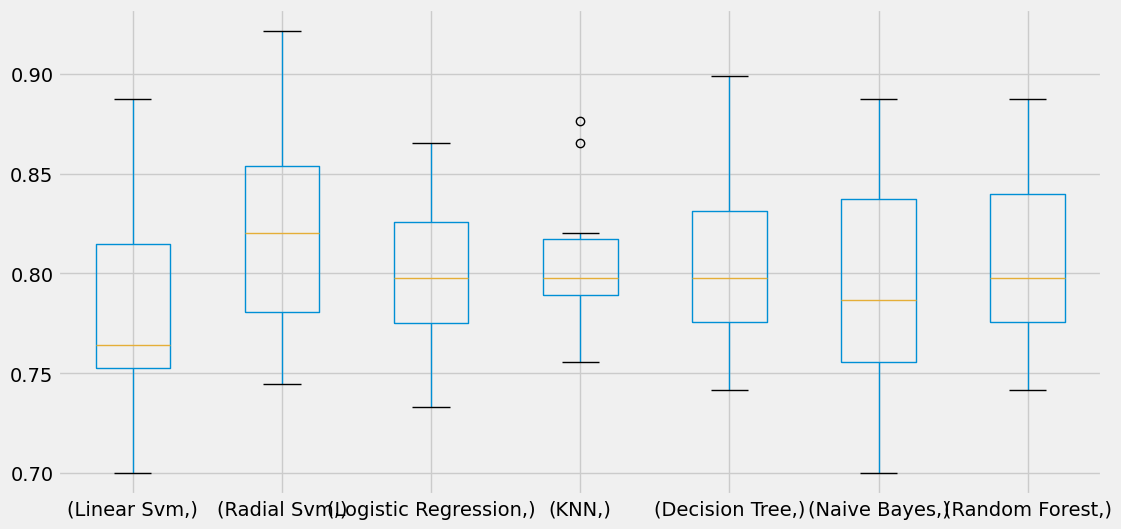

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

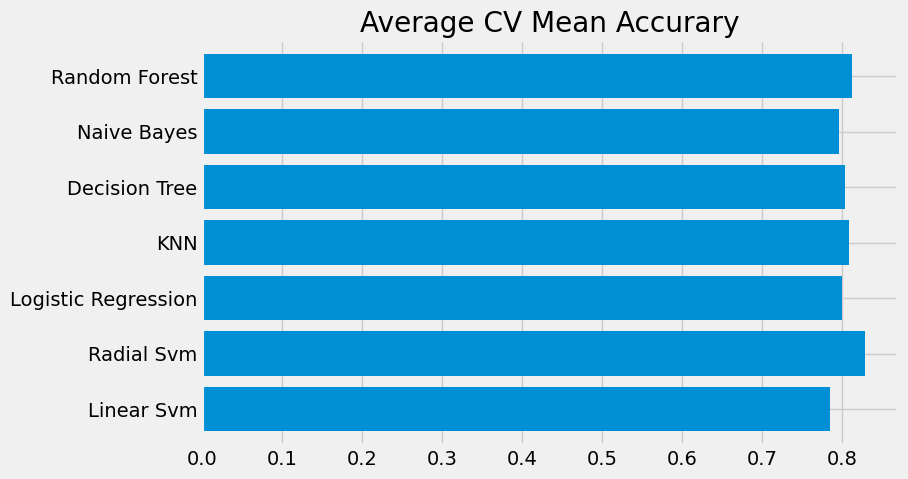

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accurary')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

# Confusion Matrix

Confusion Matrix는 실제 정답과 모델의 예측 결과를 교차해서 정리한 표

이 표는 2가지 정보를 담고 있음

1. 모델이 맞춘 것 vs 틀린 것

2. 무엇을 무엇으로 예측했는지



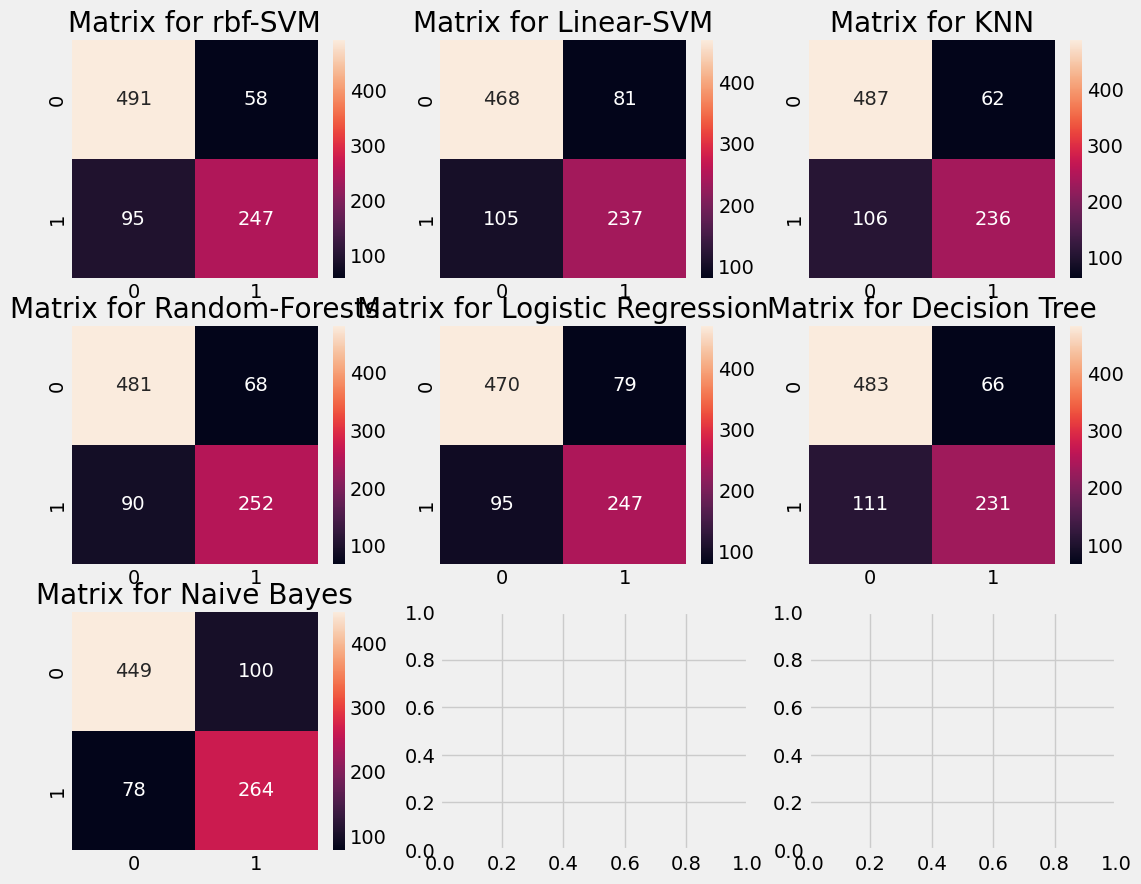

In [ ]:
from sklearn.metrics import confusion_matrix
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

Interpreting Confusion Matrix
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. Lets consider the first plot for rbf-SVM:

1)The no. of correct predictions are 491(for dead) + 247(for survived) with the mean CV accuracy being (491+247)/891 = 82.8% which we did get earlier.

2)Errors--> Wrongly Classified 58 dead people as survived and 95 survived as dead. Thus it has made more mistakes by predicting dead as survived.

By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.

세로축 (Y축)	실제 정답값 (Y 값) — Actual  
가로축 (X축)	모델이 예측한 값 (y_pred) — Predicted  

491: 실제로 죽었고, 죽었다고 맞게 예측함 (True Negative)

58: 실제로 죽었지만, 살았다고 잘못 예측함 (False Negative)

95: 실제로 살았지만, 죽었다고 잘못 예측함 (False Positive)

247: 실제로 살았고, 살았다고 맞게 예측함 (True Positive)



# Hyper-Parameters Tuning
머신러닝 모델 성능을 최적화하기 위한 아주 중요한 과정 쉽게 말해, 모델이 더 잘 맞도록 **"설정값을 조정하는 과정"**  
(여러 하이퍼파라미터 조합을 실험해서, 가장 좋은 성능을 내는 조합을 찾는 것)



In [ ]:
from sklearn.model_selection import GridSearchCV  # GridSearchCV: 모든 하이퍼파라미터 조합을 시도해 최적의 조합을 찾는 도구

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]  # SVM의 규제 강도(C) 후보 값들
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]       # RBF 커널일 때의 감도(gamma) 후보 값들
kernel = ['rbf', 'linear']                                      # 사용할 커널 종류: RBF, Linear

hyper = {'kernel': kernel, 'C': C, 'gamma': gamma}              # 실험할 모든 하이퍼파라미터 조합을 딕셔너리로 정리

gd = GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True)  # SVM을 기반으로 그리드서치 객체 생성, 진행상황 출력 설정

gd.fit(X, Y)  # X(입력), Y(레이블)를 가지고 모든 조합에 대해 교차검증 수행하며 모델 학습

print(gd.best_score_)        # 가장 높은 평균 정확도 출력 (교차검증 결과 기준)

print(gd.best_estimator_)    # 가장 성능이 좋았던 SVM 모델(최적의 하이퍼파라미터 조합)을 출력


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


GridSearchCV: 여러 하이퍼파라미터 조합을 모두 시도해서 가장 성능이 좋은 조합을 찾는 도구

# Random Forests

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


# Ensembling : 여러 모델의 예측을 조합해서 더 나은 결과를 만드는 방법

1) Voting Classifer
2) Bagging
3) Boosting

🗳️ 1. Voting Classifier (투표 기반 앙상블)
✔️ 개념
서로 다른 여러 모델의 예측 결과를 결합해서 최종 예측을 결정

사람이 투표하듯이, 모델들도 "이게 답이다!" 하고 투표함

🔹 두 가지 방식
Hard Voting: 각 모델이 예측한 클래스 라벨 중 다수결

Soft Voting: 각 모델의 확률 예측을 평균해서 가장 높은 확률을 선택

 2. Bagging (Bootstrap Aggregating)
✔️ 개념
같은 모델을 여러 개 복사해서, 서로 다른 데이터 샘플로 학습

각 모델은 원 데이터셋에서 **중복 허용하며 랜덤 샘플링(bootstrap)**함

예측은 평균(회귀) 또는 다수결(분류)

📦 대표 알고리즘: Random Forest

🚀 3. Boosting
✔️ 개념
**약한 모델(weak learner)**을 여러 개 순차적으로 학습시켜 점점 성능을 보강

앞 모델이 틀린 부분에 가중치를 두고, 뒷 모델이 그것을 보완

📦 대표 알고리즘
AdaBoost  
🚀 AdaBoost (Adaptive Boosting)
약한 모델(Weak Learner)들을 여러 개 조합해서 강한 예측기를 만들어내는 기법

 Gradient Boosting (GBM, Gradient Boosted Machines)
✔️ 개념
Gradient Boosting은 **오차(잔차)**를 줄이는 방향으로 약한 모델을 순차적으로 쌓아가는 앙상블 방법

이전 모델이 예측하지 못한 오차를 다음 모델이 예측하도록 학습함

약한 모델(예: 작은 결정트리)을 여러 개 쌓아서 강한 모델을 만들어냄

⚡️  XGBoost (Extreme Gradient Boosting)
✔️ 개념
XGBoost는 Gradient Boosting을 개선한 고속/고성능 알고리즘

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# 앙상블 모델 정의 및 학습
ensemble_lin_rbf = VotingClassifier(
    estimators=[
        ('KNN', KNeighborsClassifier(n_neighbors=10)),
        ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
        ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
        ('LR', LogisticRegression(C=0.05)),
        ('DT', DecisionTreeClassifier(random_state=0)),
        ('NB', GaussianNB()),
        ('svm', svm.SVC(kernel='linear', probability=True))
    ],
    voting='soft'  # 확률 기반 소프트 보팅
).fit(train_X, train_Y)

# 테스트 정확도 출력
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))

# 교차검증 평균 정확도 출력
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring="accuracy")
print('The cross validated score is', cross.mean())


The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [ ]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

# Confusion Matrix for the Best Model

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

#  Feature Importance

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

# 관찰결과
요약:   
  Initial, Fare_cat, Pclass, Family_Size가 여러 모델에서 중요한 변수였고  Sex는 의외로 덜 중요했지만, Initial이 성별을 대변하고 있었음  
승객의 성별, 계층, 가족 구조가 중요한 예측 요인이었음을 다시 확인할 수 있었음
